# ***PROJECT-B3TA***
## **notebook 01 | Data Loading, Cleaning and Initial EDA**  

---

### 0. Background
- An extensive search for music data led me to explore a range of music services including YouTube, LastFm, SoundCloud but in the end, given the amount of data available and the access to the API for more tailored requests, Spotify became the primary focus for this project's data requirements.

- As a first step, a selection of existing Spotify datasets were explored.

    - **Spotify's Million Playlist dataset** was initially considered but then parked due to the scale, potentially a good repository for future expansion. [(link}](https://research.atspotify.com/2020/09/the-million-playlist-dataset-remastered/)

    - **Top Songs By Country May 2020** dataset too small and the 50 most popular songs by country data didn't accurately reflect the sound of a city / place (typically swayed by more global commercial factors). [(link)](https://www.kaggle.com/datasets/hkapoor/spotify-top-songs-by-country-may-2020 )

    - **Spotify Dataset 1921-2020, 600k+ Tracks** this is a solid dataset, good quantity of tracks but following a bit of digging didn't have the best selection of artists and also was crucially missing the genre field which could be a crucial feature when determining the sound of a location. [(link)](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?select=tracks.csv)

    - **Spotify_1Million_Tracks** this dataset was a good size allowing for plenty of initial exploration with a good range artists plus genre information and all the other standard spotify metrics from the more typical (key, tempo, duration) to the more esoteric (speechiness and danceability). There was however no location information whatsoever. [(link)](https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks)

- Having exhausted publicly available datasets we looked to the Spotify API to provide us with location information. Unfortunately it turns out even the API doesn't offer much in the way of location data, whether it be relating to consumption or track uploads, anothe approach would be required..
    
    - **Spotify API** Given the lack of location information and not wanting to create a model based on the most listened to tracks in a given area (not exactly the best indicator of a locations authentic *sound*!) we needed a proxy. The solution? Create a set of 'sound profiles' for a number of locations from playlists containing a selection of tracks commonly associated with the sound of the area in question. We used the API to gather sound profiles for a mix of destinations ranging from London and New York to Berlin and Kingston, the aim being to select a mixture of locations with a spectrum of sounds that will give us a good range to create our model with. In the end we profiled sounds from the following cities;
    
        - London
        - Manchester
        - Berlin
        - Ibiza
        - Kingston
        - New York
        - LA

- What follows is a combination of cleaning and EDA as we prepare our dataset for future manipulation.

**Data Dictionary** (following initial clean and eda)

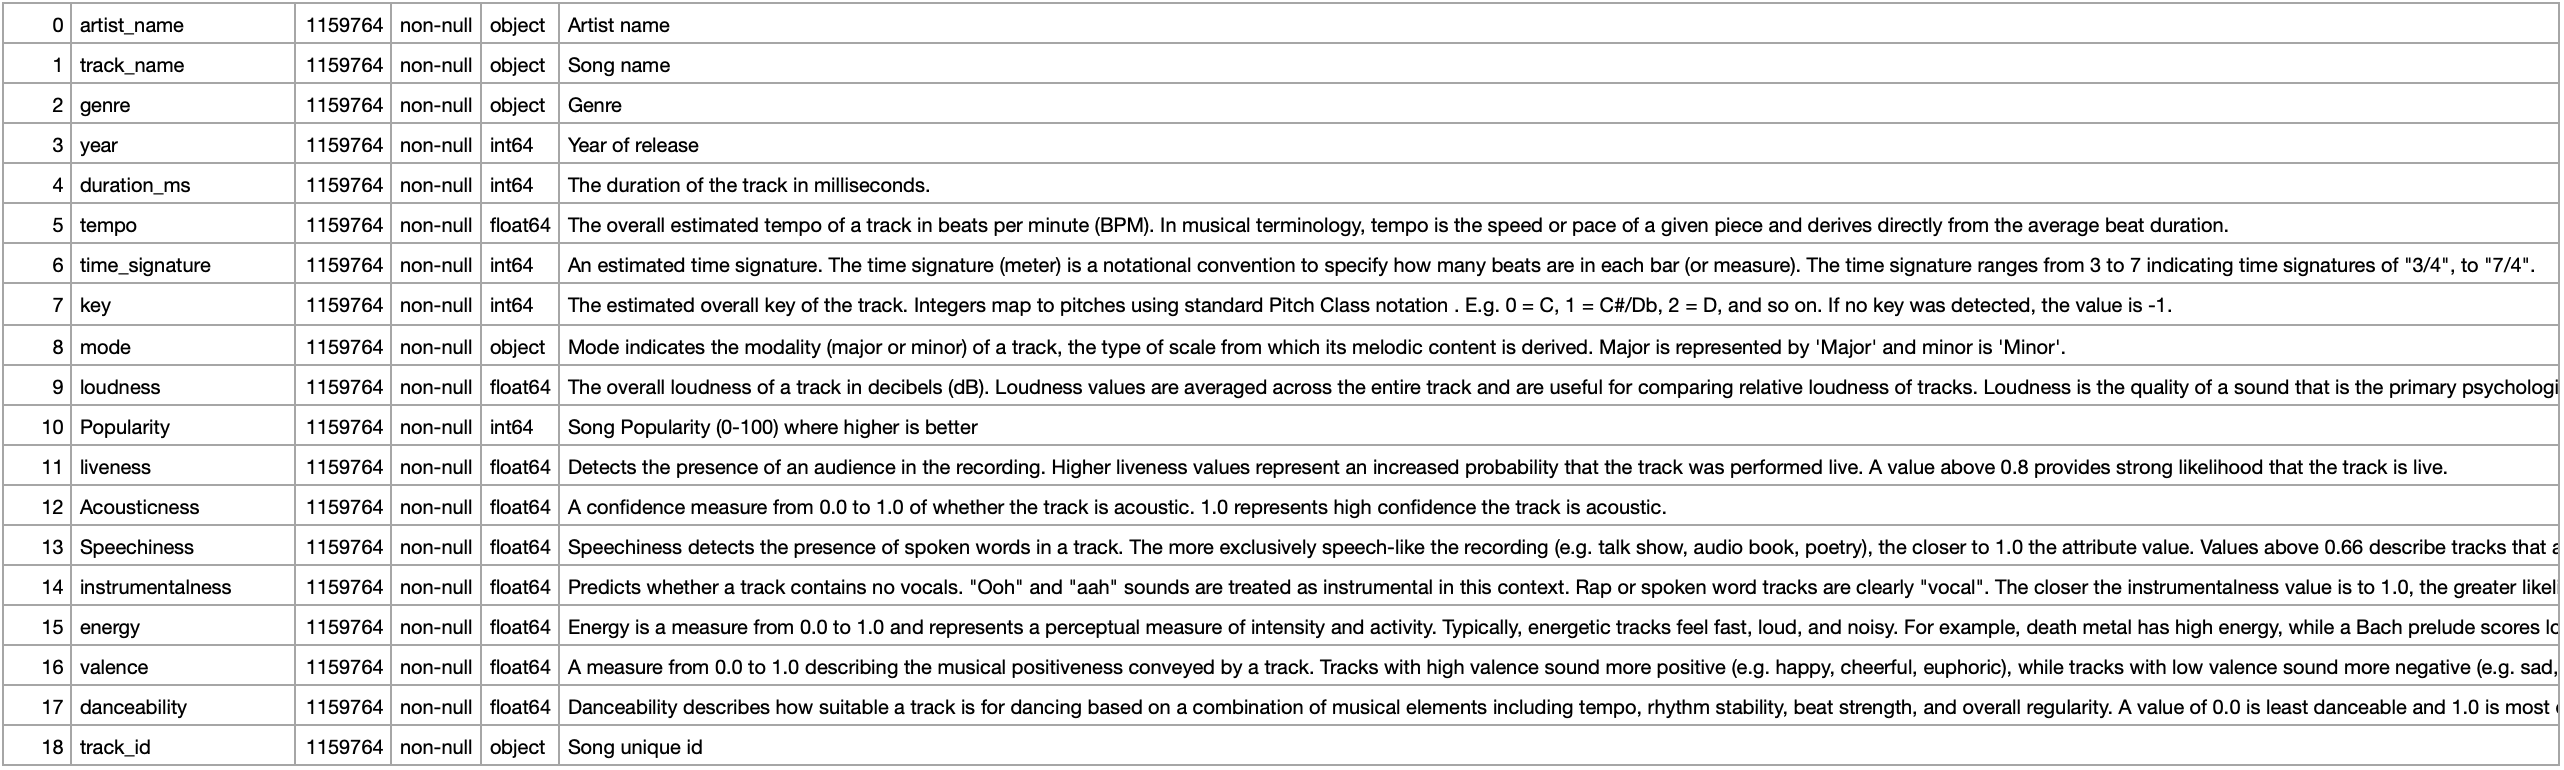

### 1. **Dataset Loading**

**Imports.**

In [1]:
import numpy as np
import pandas as pd
## Pandas has a depedency on NumPy so loads automatically but best practice to load full NumPy package
print(f"Numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
pio.renderers.default = 'notebook'

# sklearn
import sklearn as sk
from sklearn.metrics.pairwise import cosine_similarity
print(f"skLearn version: {sk.__version__}")

# scipy
import scipy
from scipy.stats import norm

# statsmodels
import statsmodels.api as sm

# b3ta functions
import b3tafunc as b3


Numpy version: 1.24.3
pandas version: 2.0.3
skLearn version: 0.24.2
Numpy version: 1.24.3
pandas version: 2.0.3
skLearn version: 0.24.2


**Load main dataset.**

In [2]:
df = pd.read_csv("../data/kaggle_milliontracks_spotify_data.csv")
df.head(3)

Unnamed: 0    artist_name        track_name                track_id  \
0           0     Jason Mraz   I Won't Give Up  53QF56cjZA9RTuuMZDrSA6   
1           1     Jason Mraz  93 Million Miles  1s8tP3jP4GZcyHDsjvw218   
2           2  Joshua Hyslop  Do Not Let Me Go  7BRCa8MPiyuvr2VU3O9W0F   

   popularity  year     genre  danceability  energy  key  loudness  mode  \
0          68  2012  acoustic         0.483   0.303    4   -10.058     1   
1          50  2012  acoustic         0.572   0.454    3   -10.286     1   
2          57  2012  acoustic         0.409   0.234    3   -13.711     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0429         0.694          0.000000    0.1150    0.139  133.406   
1       0.0258         0.477          0.000014    0.0974    0.515  140.182   
2       0.0323         0.338          0.000050    0.0895    0.145  139.832   

   duration_ms  time_signature  
0       240166               3  
1       216387               4  
2       158960               4

### 2. **Orientation & Initial Cleaning**

**Shape**
- 1,159,764 rows.
- 20 columns.

In [3]:
df.shape

(1159764, 20)

#### Duplicate rows check
- No duplicates.

In [4]:
df.duplicated().value_counts()

False    1159764
Name: count, dtype: int64

#### Check NaNs
- 16 NaNs in total. Given such a small fraction these will be dropped.

In [5]:
df.isna().sum()

Unnamed: 0           0
artist_name         15
track_name           1
track_id             0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

In [6]:
nan_trackname = df[df["track_name"].isna()].index

In [7]:
df.drop(index=nan_trackname, inplace=True)

In [8]:
nan_artistnames = df[df["artist_name"].isna()].index
nan_artistnames

Index([256971, 256972, 257024, 313028, 313050, 313063, 313117, 313153, 313174,
       313225, 369500, 369521, 369578, 369581, 369607],
      dtype='int64')

In [9]:
df.drop(index=nan_artistnames, inplace=True)

In [10]:
df.isna().sum()

Unnamed: 0          0
artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1159748 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159748 non-null  int64  
 1   artist_name       1159748 non-null  object 
 2   track_name        1159748 non-null  object 
 3   track_id          1159748 non-null  object 
 4   popularity        1159748 non-null  int64  
 5   year              1159748 non-null  int64  
 6   genre             1159748 non-null  object 
 7   danceability      1159748 non-null  float64
 8   energy            1159748 non-null  float64
 9   key               1159748 non-null  int64  
 10  loudness          1159748 non-null  float64
 11  mode              1159748 non-null  int64  
 12  speechiness       1159748 non-null  float64
 13  acousticness      1159748 non-null  float64
 14  instrumentalness  1159748 non-null  float64
 15  liveness          1159748 non-null  float64
 16  valen

**Info**
- A mixture of **int 64**, **float64** and **strings**.
- **0 NULL** values. (16 already dropped)
- All **columns** look fairly typical including all the usual spotify metrics.
- Dataset is looking **very clean** and suitable for purpose. It will form a good template for any further data that is imported during the project, the plan being to build functions to streamline the cleaning of future imports of data accessed vis the API.
- The only column that looks like it could do with some **minor cleaning** is the *'Unnamed: 0'* column which seems to be an index column.
- For a detailed breakdown of the **data dictionary** see seperate *'project-b3ta-data-dictionary.csv'*. In the absence of a readily available official spotify breakdown, the basis for this data dictionary has been taken from [figshare](https://figshare.com/articles/online_resource/Spotify_data_dictionary/21714137). This seemed to contain a good summary of metrics, however, loudness has been update to LUFS which represents the perceived loudness of a track as opposed to the actual volume in dB. This has been checked via reference to sources I'm familar with. (Dua Lipa and Overmono)

In [12]:
# Check loudness LUFS assumption - Pop; Dua Lipa (high LUFS values, highly compressed)
df[df.sort_values("popularity", ascending=False)["artist_name"] == 'Dua Lipa'][["track_name", "loudness"]].head(5)

/var/folders/p8/pddtg5cd5pxb9gdb791sg3nm0000gp/T/ipykernel_71647/1257200176.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



track_name  loudness
197697                       Be the One    -3.771
224565            Blow Your Mind (Mwah)    -4.761
224853  Hotter Than Hell - Matoma Remix    -7.000
224891                       Room for 2    -5.752
225287                 Hotter Than Hell    -4.230

In [13]:
# Check loudness LUFS assumption - Dance; Overmono (medium LUFS values & some more dynamic tracks)
df[df.sort_values("popularity", ascending=False)["artist_name"] == 'Overmono'][["track_name", "loudness"]].head(5)

/var/folders/p8/pddtg5cd5pxb9gdb791sg3nm0000gp/T/ipykernel_71647/4197378610.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



track_name  loudness
328479    Quadraluv   -13.995
494445     So U Kno    -8.357
494533          Bby    -8.792
494719  Diamond Cut    -8.819
494844    If U Ever   -16.118

#### Further exploration and cleaning

- **"Unnamed: 0" column dropped due to being an index duplicate**
    - "Unnamed: 0" column 1,159,764 uniques
    - Index 1,159,764 entries (must be unique)
    - Whilst same number of entries some seem to differ, following a bit of exploration looks like this was just a result of further editing post data extraction. No impact our requirements so column is dropped.
- **"track_id" column confirmed as unique**
    - Confirmed all entires unique.
    - Duplication with the index but kept in incase required as reference for any further API interaction.


In [14]:
pd.DataFrame(df["Unnamed: 0"].unique()).count()
# Count uniques

0    1159748
dtype: int64

In [15]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head(1)

artist_name       track_name                track_id  popularity  year  \
0  Jason Mraz  I Won't Give Up  53QF56cjZA9RTuuMZDrSA6          68  2012   

      genre  danceability  energy  key  loudness  mode  speechiness  \
0  acoustic         0.483   0.303    4   -10.058     1       0.0429   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0         0.694               0.0     0.115    0.139  133.406       240166   

   time_signature  
0               3

In [16]:
pd.DataFrame(df["track_id"].unique()).count()
# Sanity check 1,159,764 uniques, meaning all records are individual tracks

0    1159748
dtype: int64

#### Further exploration and cleaning (cont.)

- **b3.df_snapshot_vc()**
    - Function to give a value count snapshot of each column in a dataframe. Points to note;
        - "**artist_name**" - 64,159 total number of artists. 'Traditional' looks like a generic name given to unknown artists / groups, 'Various Artists' and the like also likely to feature. One to bear in mind, no action required.
        - "**popularity**" - A large number of 0 rated tracks (158,391), could consider removing these and potentially a wider range of unpopular tracks to improve recommendations.
        - "**year**" - Earliest tracks in the database from 2000. We've no clarity on what this year relates to. Date uploaded to platform most likely but this still could mean tracks produced earlier are included. The inclusion of Johann Sebastian Bach & Elvis Presley in our column of artists confirms this. Given the lack of real meaning, and given that we don't really need our model to favour older more contemporary artists this column could be dropped but we'll keep in just for the time being on the offchance it helps reveal other patterns in the data but **we shall convert to a string** (to be considered as categorical data).
        - "**genre**" - 82 different genres in total. Potentially an important metric for a location based algorithm given the propensity of certain genres in certain areas. Interesting to note, black-metal is the most popular genre! As this is a sample of data from Kaggle, the selection itself (despite its massive size) may skew our recommendations slightly. Just one to bare in mind for now.
        - "**energy**" - High numbers of tracks with high energy ratings, lower instances of lower energy ratings.
        - "**key**"" - Possibly will need converting into a categorical variable to avoid infering a numerical weighting, but we'll hold off for now until we understand more on the model(s) we'll be working with.
        - "**mode**" - Mode indicates a higher percentage of tracks in a major key. Converted into categorical variable for the time being to avoid infering a numerical weighting.
        - "**acousticness**" - Maybe slightly surprisingly given the recent time-window, seemingly a large number of tracks with high accousticness ratings (i.e. lots of acoustic tracks).
        - "**instrumentalness**" - Potential for colinearity with 'speechiness'; an inverse relationship.
        - "**valence**" - High numbers of tracks with high valence scores (positive vibe), likely to correlate with high numbers of tracks with high energy ratings and also relatively high numbers of tracks in a major key.
        - "**tempo**" - A large number of tracks with a 0.000 score for tempo, presumably ambient. Unsurprisingly the rest of the top counts are around the 128bpm mark.
        - "**duration_ms**" - Top durations around the 2-4min mark (as expected).
        - "**time_signature**" - By far the most common time signature is 4/4 (no surprises there!) followed by 3/4. Potentially to be converted into a categorical variable. Also the numbers don't actually relate to Spotify's official discription so may need to drop. Keeping in for now as there is a high chance 4/4 and 3/4 are accurate, the other time signatures make up a relatively small % of the data.
- **Column reorganisation**
    - Columns re-ordered following initial observation to place the columns likely to impact our recommendations closer to the left whilst keeping similar groups of columns together.


#### Quick look at features...

In [17]:
b3.df_snapshot_vc(df)

ARTIST_NAME:

artist_name
Traditional              4058
Grateful Dead            2320
Johann Sebastian Bach    2125
Giacomo Meyerbeer        1345
Elvis Presley            1242
                         ... 
Gaia Consort                1
Dzej Ramadanovski           1
Goca Trzan                  1
Robbie O'Connell            1
Sleep Therapist             1
Name: count, Length: 64158, dtype: int64


TRACK_NAME:

track_name
Intro                                      466
Home                                       313
Forever                                    229
Hold On                                    224
Stay                                       220
                                          ... 
Garden of Madness                            1
The Power Within (Altitude 2019 Anthem)      1
Homecoming (ABGT350WD) - Enamour Remix       1
Phone Down - BRKLYN Remix                    1
Hit the Road Jack (Pé Na Éstrada)            1
Name: count, Length: 882349, dtype: int64


TRACK_ID:

track

#### Re-ordering columns

In [18]:
df = df.reindex(columns=['artist_name',
                    'track_name',
                    'genre',
                    'year',
                    'duration_ms',
                    'tempo',
                    'time_signature',
                    'key',
                    'mode',
                    'loudness',
                    'popularity',
                    'liveness',
                    'acousticness',
                    'speechiness',
                    'instrumentalness',
                    'energy',
                    'valence',
                    'danceability',
                    'track_id'
                   ])
df.head(1)
# Re-order columns

artist_name       track_name     genre  year  duration_ms    tempo  \
0  Jason Mraz  I Won't Give Up  acoustic  2012       240166  133.406   

   time_signature  key  mode  loudness  popularity  liveness  acousticness  \
0               3    4     1   -10.058          68     0.115         0.694   

   speechiness  instrumentalness  energy  valence  danceability  \
0       0.0429               0.0   0.303    0.139         0.483   

                 track_id  
0  53QF56cjZA9RTuuMZDrSA6

#### Re-assign types - convert to categorical (year and mode)

In [19]:
df["year"] = df["year"].astype(str)
# Change "year" datatype to string (categorical)

In [20]:
df['mode'] = np.where(df['mode'] == 1, 'Major', 'Minor')
# Change "mode" datatype to string (categorical)

### 3. **Initial Univariate Review of Main Dataset**

**b3.df_numcat()**
- Function that takes a single DataFrame as an argument and returns two DataFrames; A copy of the categorical columns (df_cat) and a copy of the numerical columns (df_num).
     - As above, whilst "**time_signature**" and "**key**" should possible be seen as categorical (so potential for string conversion) I'm keeping as they are for now until I have more clarity on the model approach.


In [21]:
df_cat, df_num = b3.df_numcat(df)
df_cat.head(1)

artist_name       track_name     genre  year   mode                track_id
0  Jason Mraz  I Won't Give Up  acoustic  2012  Major  53QF56cjZA9RTuuMZDrSA6

In [22]:
df_num.head(1)

duration_ms    tempo  time_signature  key  loudness  popularity  liveness  \
0       240166  133.406               3    4   -10.058          68     0.115   

   acousticness  speechiness  instrumentalness  energy  valence  danceability  
0         0.694       0.0429               0.0   0.303    0.139         0.483

#### Univariate Analysis - **Categorical column exploration**
- **Genres**
    - 82 Genres. Biggest class accounts for less that 2%. Genres could well play an important role in this project given the close association with place (local scenes).
    - 82 categories however, is too much to process with hot ones, we will need to formulate a plan how to reduce down (collapse sub genres?)
- **Years**
    - Fairly even spread of number of tracks across the years, as above, question marks over whether we leave in.

In [23]:
genre_counts = df_cat["genre"].value_counts()
genre_counts_nmlz = df_cat["genre"].value_counts(normalize=True)
genre_counts_nmlz = round(genre_counts_nmlz * 100, 2)
genre_counts_nmlz

genre
black-metal       1.88
gospel            1.86
ambient           1.84
acoustic          1.82
alt-rock          1.80
                  ... 
chicago-house     0.45
dubstep           0.41
detroit-techno    0.34
rock              0.29
songwriter        0.05
Name: proportion, Length: 82, dtype: float64

In [24]:
import plotly.graph_objects as go

# Calculate total count
total_count = genre_counts.sum()

# Calculate percentage of total count for each genre
percentages = (genre_counts / total_count) * 100

# genres by counts 
fig = go.Figure()

genres = genre_counts.index
counts = genre_counts.values

# Generate hover text with count and percentage
hover_text = [f'Count: {count}<br>Percentage of Total: {percent:.2f}%' 
              for count, percent in zip(counts, percentages)]

genre_cnts = go.Bar(
    x=genres,
    y=counts,
    name='Genre',
    marker_color="#1DFD54",
    opacity=0.9,
    hovertext=hover_text  # Set hover text
)

fig.add_trace(genre_cnts)

chart_layout = go.Layout(
    width=2000,
    height=600,
    title='Genres',
    xaxis_title='Genre',
    yaxis_title='Count'
)

fig.update_layout(chart_layout)

fig.show()


In [25]:
'''
import plotly.graph_objects as go

# Calculate total count
total_count = genre_counts.sum()

# Calculate percentage of total count for each genre
percentages = (genre_counts / total_count) * 100

# genres by counts 
fig = go.Figure()

genres = genre_counts.index
counts = genre_counts.values

# Generate hover text with count and percentage
hover_text = [f'Count: {count}<br>Percentage of Total: {percent:.2f}%' 
              for count, percent in zip(counts, percentages)]

genre_cnts = go.Bar(
    x=genres,
    y=counts,
    name='Genre',
    marker_color="#1DFD54",
    opacity=0.9,
    hovertext=hover_text  # Set hover text
)

fig.add_trace(genre_cnts)

chart_layout = go.Layout(
    width=2000,
    height=600,
    title='Genres',
    xaxis_title='Genre',
    yaxis_title='Count'
)

fig.update_layout(chart_layout)

fig.write_image("data/fig1.png")
'''



'\nimport plotly.graph_objects as go\n\n# Calculate total count\ntotal_count = genre_counts.sum()\n\n# Calculate percentage of total count for each genre\npercentages = (genre_counts / total_count) * 100\n\n# genres by counts \nfig = go.Figure()\n\ngenres = genre_counts.index\ncounts = genre_counts.values\n\n# Generate hover text with count and percentage\nhover_text = [f\'Count: {count}<br>Percentage of Total: {percent:.2f}%\' \n              for count, percent in zip(counts, percentages)]\n\ngenre_cnts = go.Bar(\n    x=genres,\n    y=counts,\n    name=\'Genre\',\n    marker_color="#1DFD54",\n    opacity=0.9,\n    hovertext=hover_text  # Set hover text\n)\n\nfig.add_trace(genre_cnts)\n\nchart_layout = go.Layout(\n    width=2000,\n    height=600,\n    title=\'Genres\',\n    xaxis_title=\'Genre\',\n    yaxis_title=\'Count\'\n)\n\nfig.update_layout(chart_layout)\n\nfig.write_image("data/fig1.png")\n'

In [26]:
year_counts = df_cat["year"].value_counts()

In [27]:
year_counts_sorted = year_counts.sort_values(ascending=False)
year_counts_sorted

year
2018    56565
2017    56238
2019    55788
2020    55066
2012    54797
2022    53692
2021    53566
2013    53216
2014    53179
2015    51607
2008    47432
2009    46869
2010    46868
2011    46444
2007    46001
2006    45474
2000    44034
2005    43779
2004    43390
2003    42368
2001    42351
2002    42102
2016    40273
2023    38649
Name: count, dtype: int64

In [28]:
# years by counts
fig = go.Figure()

sorted_year_counts = year_counts_sorted

years = sorted_year_counts.index
counts = sorted_year_counts.values

year_cnts = go.Bar(x=years, y=counts, name='Year', marker_color="#1DFD54", opacity=0.9)

fig.add_trace(year_cnts)

chart_layout = go.Layout(width=800,
                         height=500,
                         title='Genres',
                         xaxis_title='Year',
                         yaxis_title='Count',
                         xaxis=dict(tickmode='array',
                                    tickvals=years)
                        )

fig.update_layout(chart_layout)

fig.update_layout()

fig.show()

#### Univariate Analysis - **Numerical column exploration**
- **df_numstats()**
    - Takes a single DataFrame as an argument (Numeric variables only).
    - Prints key stats metrics for each column; Mean, Median, Range, IQR, Standard Deviation, Max and Min
    - **Key observations**;
        - "**duration_ms**" - potentially some wild outliers to remove (max is 40x standard deviations away from the mean
        - "**tempo**" - looks like normally distributed around a mean of 121bpm
        - "**loudness**" - negative skew, likely a result of the loudness war (https://en.wikipedia.org/wiki/Loudness_war)
        - "**popularity**" - not many scores over 60 and a huge number at 0, presummably a result of lack of listens.
        - "**acousticness**" - has two peaks although primarily distrubted towards the bottom end, similar pattern in speechniess and instrumentalness, possibly related? One to inspect further (correlations)
        - "**valence**" - some big count outliers at the extreme ends of the distribution
        - "**danceability**" - looks fairly normally distributed, link to tempo?
        
        

In [29]:
df_num.head(1)

duration_ms    tempo  time_signature  key  loudness  popularity  liveness  \
0       240166  133.406               3    4   -10.058          68     0.115   

   acousticness  speechiness  instrumentalness  energy  valence  danceability  
0         0.694       0.0429               0.0   0.303    0.139         0.483

In [30]:
df_num

duration_ms    tempo  time_signature  key  loudness  popularity  \
0             240166  133.406               3    4   -10.058          68   
1             216387  140.182               4    3   -10.286          50   
2             158960  139.832               4    3   -13.711          57   
3             304293  204.961               4   10    -9.845          58   
4             244320  171.864               4    6    -5.419          54   
...              ...      ...             ...  ...       ...         ...   
1159759       344013  107.951               3   10    -6.453           4   
1159760       285067  119.897               4    7    -7.588           3   
1159761       214253  100.076               4    5    -8.512           2   
1159762       239133  133.885               3    0   -13.343           0   
1159763       212227   89.987               4    1    -7.292           3   

         liveness  acousticness  speechiness  instrumentalness  energy  \
0          0.1150        0.6940       0.0429          0.000000   0.303   
1          0.0974        0.4770       0.0258          0.000014   0.454   
2          0.0895        0.3380       0.0323          0.000050   0.234   
3          0.0797        0.8070       0.0363          0.000000   0.251   
4          0.1100        0.0726       0.0302          0.019300   0.791   
...           ...           ...          ...               ...     ...   
1159759    0.1590        0.3250       0.0736          0.000141   0.742   
1159760    0.1300        0.7880       0.0326          0.000129   0.675   
1159761    0.0936        0.4770       0.0274          0.003130   0.440   
1159762    0.1250        0.4310       0.0276          0.000063   0.405   
1159763    0.0581        0.2200       0.1250          0.000008   0.861   

         valence  danceability  
0         0.1390         0.483  
1         0.5150         0.572  
2         0.1450         0.409  
3         0.5080         0.392  
4         0.2170         0.430  
...          ...           ...  
1159759   0.5220         0.373  
1159760   0.2640         0.516  
1159761   0.0351         0.491  
1159762   0.2020         0.480  
1159763   0.8570         0.782  

[1159748 rows x 13 columns]

In [31]:
b3.df_numstats(df_num)

DURATION_MS
MEAN: 249558.72
MEDIAN: 225740.5
RANGE: 5998422
IQR: 105816.0
STANDARDDEVIATION: 149424.27
MAX: 6000495
MIN: 2073



TEMPO
MEAN: 121.38
MEDIAN: 121.93
RANGE: 249.99
IQR: 41.1
STANDARDDEVIATION: 29.78
MAX: 249.99
MIN: 0.0



TIME_SIGNATURE
MEAN: 3.89
MEDIAN: 4.0
RANGE: 5
IQR: 0.0
STANDARDDEVIATION: 0.47
MAX: 5
MIN: 0



KEY
MEAN: 5.29
MEDIAN: 5.0
RANGE: 11
IQR: 6.0
STANDARDDEVIATION: 3.56
MAX: 11
MIN: 0



LOUDNESS
MEAN: -8.98
MEDIAN: -7.45
RANGE: 64.27
IQR: 5.55
STANDARDDEVIATION: 5.68
MAX: 6.17
MIN: -58.1



POPULARITY
MEAN: 18.38
MEDIAN: 15.0
RANGE: 100
IQR: 24.0
STANDARDDEVIATION: 15.89
MAX: 100
MIN: 0



LIVENESS
MEAN: 0.22
MEDIAN: 0.13
RANGE: 1.0
IQR: 0.19
STANDARDDEVIATION: 0.2
MAX: 1.0
MIN: 0.0



ACOUSTICNESS
MEAN: 0.32
MEDIAN: 0.15
RANGE: 1.0
IQR: 0.63
STANDARDDEVIATION: 0.35
MAX: 1.0
MIN: 0.0



SPEECHINESS
MEAN: 0.09
MEDIAN: 0.05
RANGE: 0.97
IQR: 0.05
STANDARDDEVIATION: 0.13
MAX: 0.97
MIN: 0.0



INSTRUMENTALNESS
MEAN: 0.25
MEDIAN: 0.0
RANGE: 1.0
IQR: 0.61
STANDA

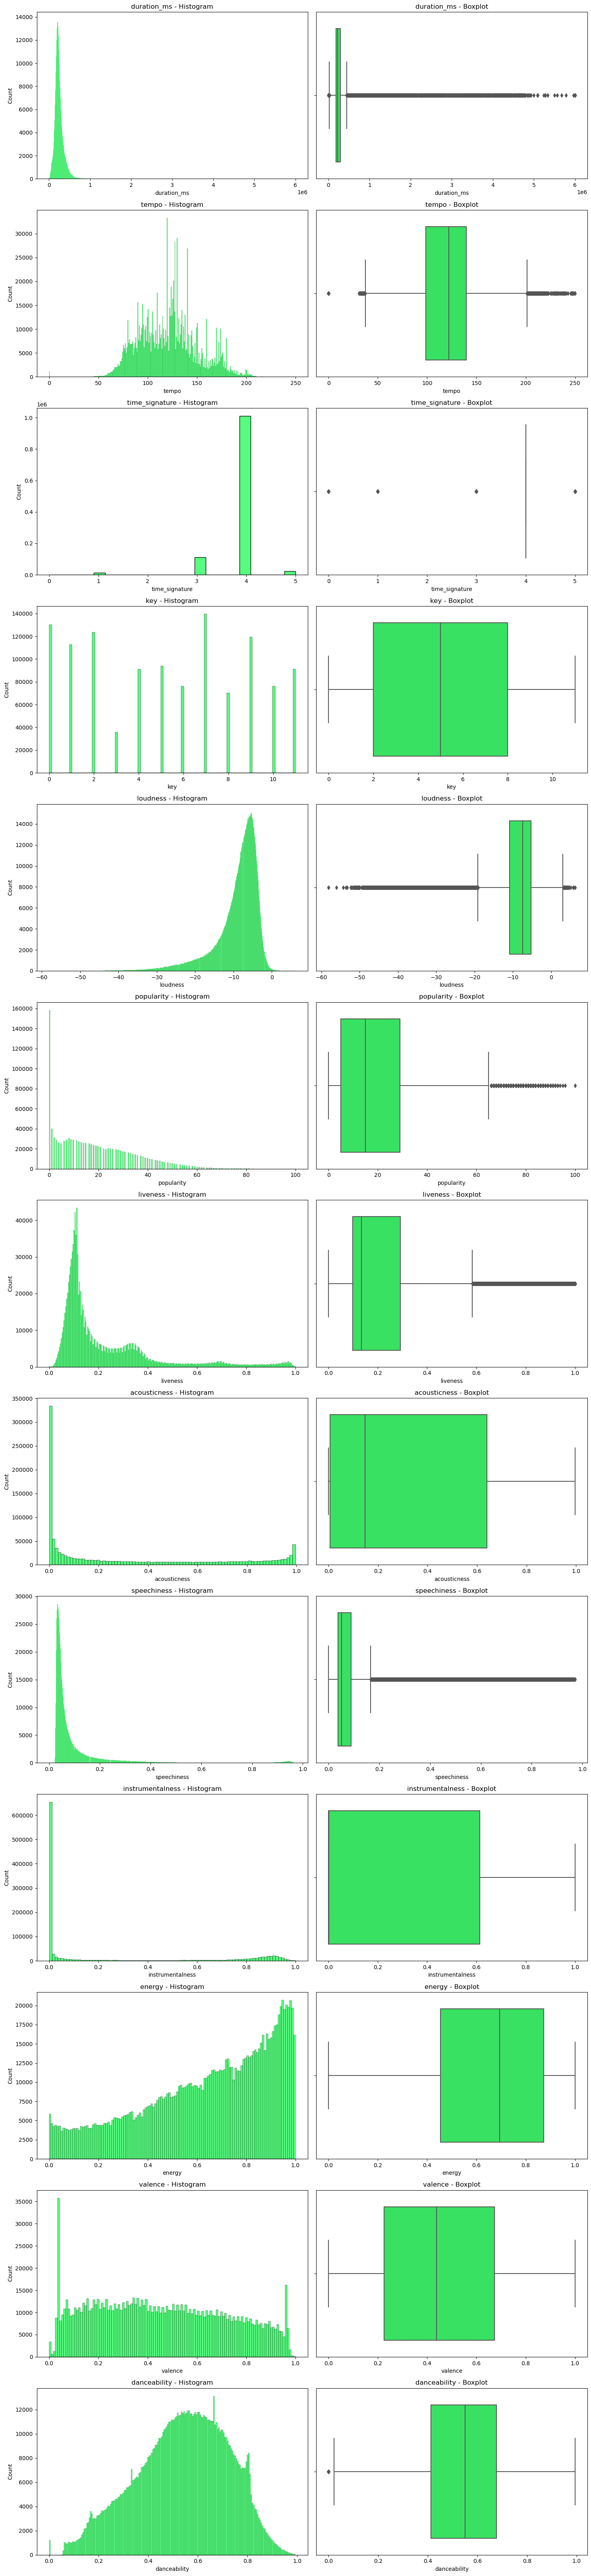

In [32]:
b3.df_histoboxme(df_num)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1159748 entries, 0 to 1159763
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159748 non-null  object 
 1   track_name        1159748 non-null  object 
 2   genre             1159748 non-null  object 
 3   year              1159748 non-null  object 
 4   duration_ms       1159748 non-null  int64  
 5   tempo             1159748 non-null  float64
 6   time_signature    1159748 non-null  int64  
 7   key               1159748 non-null  int64  
 8   mode              1159748 non-null  object 
 9   loudness          1159748 non-null  float64
 10  popularity        1159748 non-null  int64  
 11  liveness          1159748 non-null  float64
 12  acousticness      1159748 non-null  float64
 13  speechiness       1159748 non-null  float64
 14  instrumentalness  1159748 non-null  float64
 15  energy            1159748 non-null  float64
 16  valen

In [34]:
df.columns

Index(['artist_name', 'track_name', 'genre', 'year', 'duration_ms', 'tempo',
       'time_signature', 'key', 'mode', 'loudness', 'popularity', 'liveness',
       'acousticness', 'speechiness', 'instrumentalness', 'energy', 'valence',
       'danceability', 'track_id'],
      dtype='object')

### 4. **Initial Bivariate Review of Main Dataset**

#### Initial Bivariate Analysis - **Numerical column correlation heatmap**
- In the absence of an obvious y target, we consider relationships across the numerical variables. Some initial observations;        
    - loudness and energy (strong positive)
    - loudness and acousticness (strong negative) 
    - acousticness and energy (strong negative)
    - valence and danceability (positive)
    - loudness and instrumentalness (negative)
    - loudness and tempo, valence, danceability (weak positive)
    - liveness and speechless (weak positive)
    - tempo and acousticness (weak negative)
    - key and mode (weak negative) - unusual

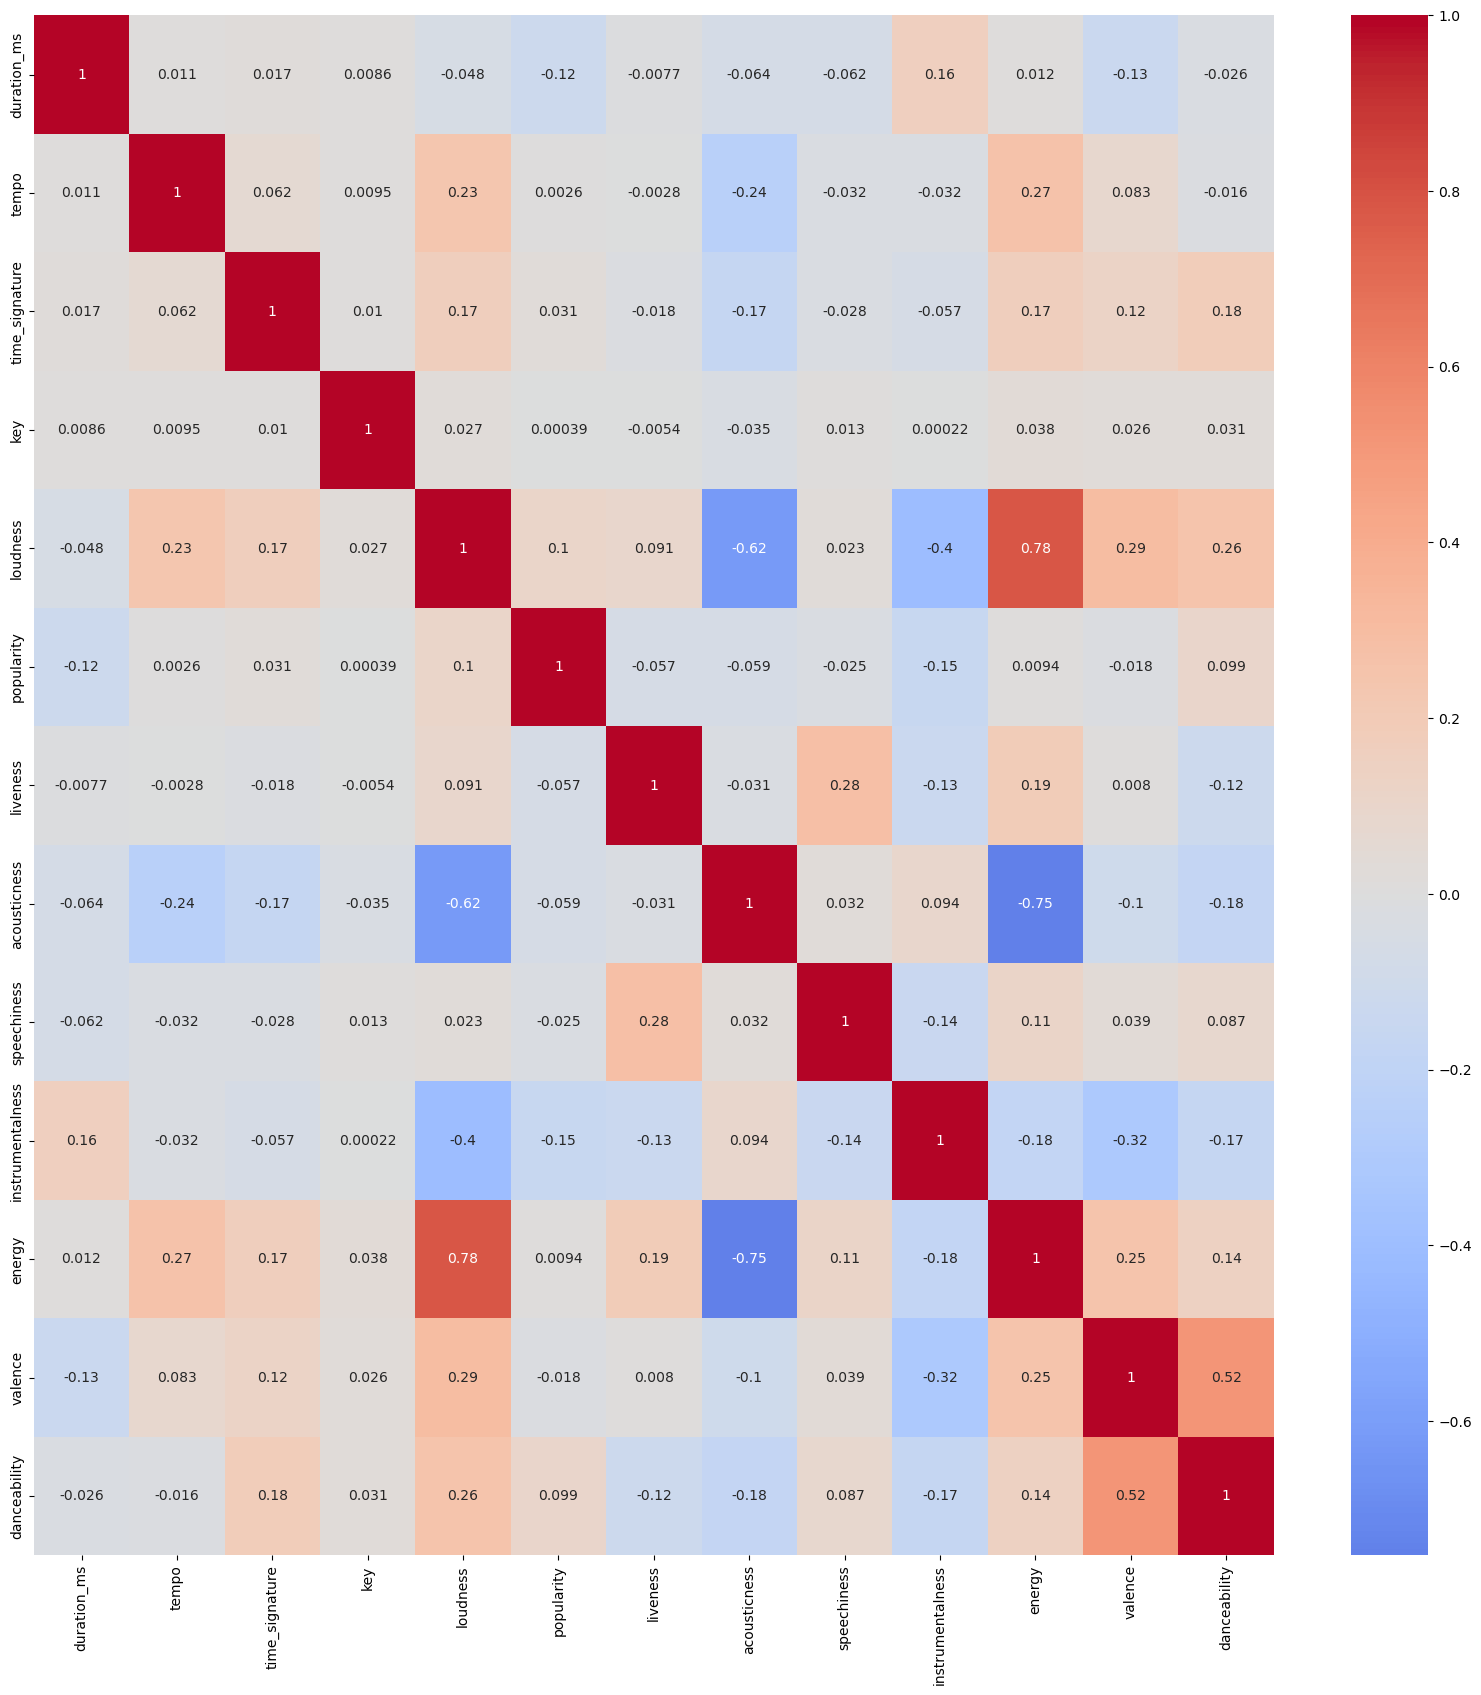

In [35]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_num.corr(), cmap='coolwarm', annot=True, center = 0)
plt.show()

#### Initial Bivariate Analysis - **Track Relationships and the Cosine Similarity**
- **LondonSound comparison to a random sample**
    - Here we created a quick ***london_sound*** 'playlist' comprised of tracks from a range London artists.
    - The aim was to use the cosine similarity to compare inter row and inter-column relationships amongst London artists, with the inter row and inter-column relationships of a random sample of tracks ***random_sample*** (numeric cols only). The hypothesis was the relationships between London artist columns would be stronger when column vectors (or row vectors) were compared..
    - ..unfortunately the tests weren't very successful row-wise! More time and reading is required to explore this.
    - However, when comparing absolute sum of cosine similarities between column vectors for each df - london_sound and random_sound, potential promise shown... (also held true for just the straight sum - ie not absolute)
    - As plot shows high score for london_sound suggests (slightly) stronger relationship.
    - That said this may be a bit hacked together and quite possibly wrong. More work needed in this area.
    - If time allowed that plan was also to compare indiviudal tracks using the dot product (a selection of tracks from similar areas and different ones). Potentially one to follow up on.

In [36]:
#1 Burial
burial = df[df["artist_name"] == 'Burial']
burial = burial.sort_values("popularity", ascending=False).head()
#2 Dizzee Rascal
dizzee = df[df["artist_name"] == 'Dizzee Rascal'][11:16]
#3 Sex Pistols
sex_pistols = df[df["artist_name"] == 'Sex Pistols']
sex_pistols = sex_pistols.sort_values("popularity", ascending=False).head()
#4 The Clash
clash = df[df["artist_name"] == 'The Clash']
clash = clash.head()
#5 The Rolling Stones
stones = df[df["artist_name"] == 'The Rolling Stones']
stones = stones.sort_values("popularity", ascending=False).head()
#6 Amy Winehouse
amy = df[df["artist_name"] == 'Amy Winehouse']
amy = amy.sort_values("popularity", ascending=False).head()
#7 Jamie xx
jamiexx = df[df["artist_name"] == 'Jamie xx'][1:6]
#8 The Libertines
libs = df[df["artist_name"] == 'The Libertines']
libs = libs.sort_values("popularity", ascending=False).head()
#9 Elton John
elton = df[df["artist_name"] == 'Elton John']
elton = elton.sort_values("popularity", ascending=False).head()
#10 David Bowie
bowie = df[df["artist_name"] == 'David Bowie']
bowie = bowie.sort_values("popularity", ascending=False).head()
#11 Blur
blur = df[df["artist_name"] == 'Blur']
blur = blur.sort_values("popularity", ascending=False).head()
#12 
overmono = df[df["artist_name"] == 'Overmono']
overmono = overmono.sort_values("popularity", ascending=False).head()

In [37]:
london_sound = pd.concat([blur, bowie, elton, libs, jamiexx, amy, stones, clash, sex_pistols, dizzee, burial, overmono], axis=0)
london_sound

artist_name  \
623677                 Blur   
623895                 Blur   
752183                 Blur   
623915                 Blur   
752385                 Blur   
97190           David Bowie   
742588          David Bowie   
742543          David Bowie   
742545          David Bowie   
742553          David Bowie   
519369           Elton John   
293121           Elton John   
568501           Elton John   
292689           Elton John   
514910           Elton John   
752220       The Libertines   
794631       The Libertines   
794691       The Libertines   
710118       The Libertines   
794820       The Libertines   
126519             Jamie xx   
126815             Jamie xx   
175438             Jamie xx   
175444             Jamie xx   
175507             Jamie xx   
922817        Amy Winehouse   
922818        Amy Winehouse   
922819        Amy Winehouse   
922823        Amy Winehouse   
922820        Amy Winehouse   
410168   The Rolling Stones   
465456   The Rolling Stones   
519381   The Rolling Stones   
828426   The Rolling Stones   
465493   The Rolling Stones   
96532             The Clash   
96534             The Clash   
96548             The Clash   
96559             The Clash   
96560             The Clash   
1104269         Sex Pistols   
572614          Sex Pistols   
1104404         Sex Pistols   
1104405         Sex Pistols   
1104435         Sex Pistols   
775899        Dizzee Rascal   
775933        Dizzee Rascal   
776070        Dizzee Rascal   
818496        Dizzee Rascal   
818528        Dizzee Rascal   
546560               Burial   
935661               Burial   
440206               Burial   
935663               Burial   
548228               Burial   
595500             Overmono   
494445             Overmono   
595592             Overmono   
494533             Overmono   
548223             Overmono   

                                                track_name       genre  year  \
623677                                        Girls & Boys    alt-rock  2000   
623895                                            Parklife    alt-rock  2000   
752183                                           Good Song    alt-rock  2003   
623915                                       Country House    alt-rock  2000   
752385                                         Out of Time    alt-rock  2003   
97190                                      Valentine's Day        rock  2013   
742588                         Modern Love - 2002 Remaster        rock  2002   
742543                 This Is Not America - 2002 Remaster        rock  2002   
742545              Heroes - Single Version; 2002 Remaster        rock  2002   
742553                                Fame - 1999 Remaster        rock  2002   
519369                             Cold Heart - PNAU Remix        rock  2021   
293121          Can You Feel The Love Tonight - Remastered       piano  2017   
568501                   Hold Me Closer - Joel Corry Remix       piano  2022   
292689                Are You Ready For Love? - Remastered       piano  2017   
514910                               Cold Heart - Acoustic       piano  2021   
752220                        Don't Look Back into the Sun    alt-rock  2003   
794631                                  Can't Stand Me Now    alt-rock  2004   
794691                        Music When The Lights Go Out    alt-rock  2004   
710118                                     Time for Heroes    alt-rock  2002   
794820                                      What Katie Did    alt-rock  2004   
126519                           All Under One Roof Raving     electro  2014   
126815                                                Girl  electronic  2014   
175438                I Know There's Gonna Be (Good Times)     electro  2015   
175444                                         Loud Places     electro  2015   
175507                                                Gosh     electro  2015   
922817   Valerie - Live At BBC Radio 1 Live 

In [38]:
random_sample = df.sample(60, random_state=4)
random_sample

artist_name  \
1148544                   Rockpile   
171077                 Kyle Kinane   
919039                 Los Van Van   
1097747                    CAPSULE   
1114059               Tim Halperin   
1137753             Wes Montgomery   
910308                 Hakan Altun   
835628            Osvaldo Pugliese   
526333                   Dog Music   
1119473        Visions of Atlantis   
458139               Silent Planet   
398069                  Ben Böhmer   
844543                Chingo Bling   
45980                   Bobby Cruz   
765381                   Brand New   
69040               The White Lamp   
1100262            Plácido Domingo   
350639               Kishore Kumar   
1007650               Brad Mehldau   
529590              Above & Beyond   
98799                 ChocQuibTown   
265180                 Chris Brown   
1124872               Arctic Night   
1033507         London Elektricity   
284097                       Pappo   
326731                   Eliminate   
834694               Gyllene Tider   
838244                Foo Fighters   
268413                      Ataxia   
791397                  The Sounds   
944563               Banda Kassikó   
230395                      K.L.O.   
856950                  Byron Cage   
220665               Peter Pearson   
1158906              Tube & Berger   
866386               Still Remains   
198342                Unnikrishnan   
71500             Derrick Harriott   
269230                  Diana Ross   
702169         Hamilton De Holanda   
1157639               Los Secretos   
165467                        Auðn   
396792                     Renacer   
231045                      Matoma   
727321            Darryl D'Bonneau   
612950           The Three O'Clock   
701894         Lupicínio Rodrigues   
683489                     Spice 1   
514966                    Jake Eaw   
770937         The Gospel Keynotes   
594438                      NAZAAR   
1113179                Ursula 1000   
130494       Red Hot Chili Peppers   
148482              The Connection   
115898                       eevee   
644290        Duo Ràfols Rodriguez   
1070057                     Akitsa   
754953   Mississippi Joe Callicott   
269280              Patrice Rushen   
761299              Torture Killer   

                                         track_name           genre  year  \
1148544           Crawling From The Wreckage - Live       power-pop  2011   
171077                          Corporately Stifled          comedy  2015   
919039                              Que Palo Es Ese           salsa  2006   
1097747                                   The Music           k-pop  2010   
1114059                            She Sets Me Free        acoustic  2011   
1137753                                 What's New?          guitar  2011   
910308                       Kendi Halime Gülüyorum           k-pop  2006   
835628                         Derecho viejo (1945)           tango  2004   
526333                                   Pure River           sleep  2021   
1119473                                    New Dawn       classical  2011   
458139                           Native Blood Redux       metalcore  2020   
398069                                    Breathing           house  2019   
844543                    Quick Eskit (deat Chango)          comedy  2005   
45980                        Volver A Santo Domingo           salsa  2012   
765381   I Will Play My Game Beneath The Spin Light             emo  2003   
69040                                  Make It Good      deep-house  2013   
1100262                            Till I Loved You           opera  2010   
350639    Aaj Rapat Jaayen To (From "Namak Halaal")        pop-film  2018   
1007650                                Buddha Realm           piano  2008   
529590                          Buzz - Buzztalk Mix          trance  2021   
98799                     Condoto - Estudio En Vivo           salsa  2013   
265180    

In [39]:
ldn_df_cat, ldn_df_num = b3.df_numcat(london_sound)
rand_df_cat, rand_df_num = b3.df_numcat(random_sample)

#### Scale.

In [40]:
from sklearn.preprocessing import StandardScaler

# Make scaler
standard_scaler = StandardScaler()

# 3. fit the scaler
standard_scaler.fit(ldn_df_num)

# 4. transform the data (//nb - output is an np.array)
ldn_df_num_scl = standard_scaler.transform(ldn_df_num)


In [41]:
type(ldn_df_num_scl)

numpy.ndarray

In [42]:
from sklearn.preprocessing import StandardScaler

# Make scaler
standard_scaler = StandardScaler()

# 3. fit the scaler
standard_scaler.fit(rand_df_num)

# 4. transform the data.
rand_df_num_scl = standard_scaler.transform(rand_df_num)

#### Calc cosine similarity.

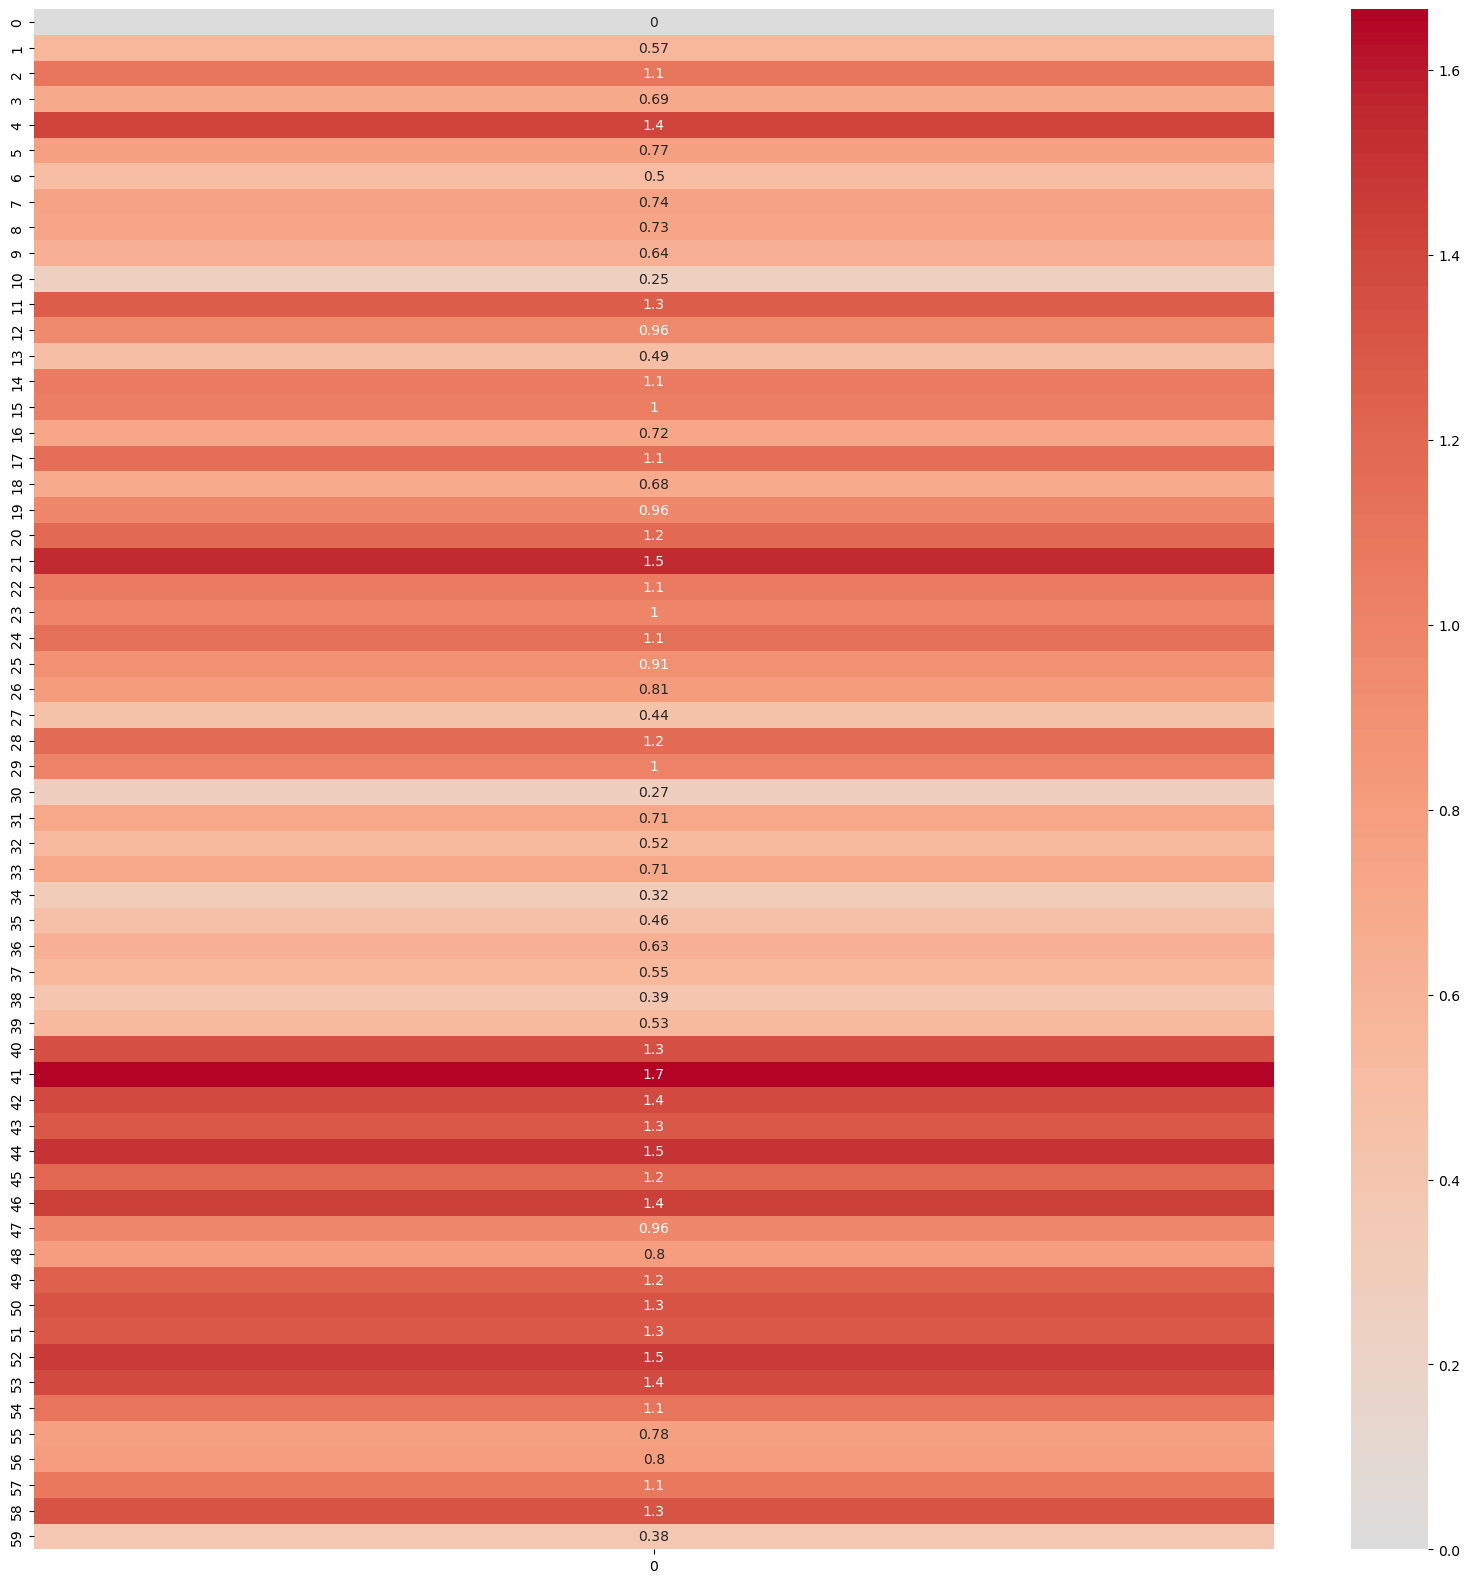

In [43]:
# Import
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
ldn_df_num_scl_cosim = cosine_similarity(ldn_df_num_scl)

# Convert cosine similarity to DataFrame
ldn_df_num_scl_cosim_df = pd.DataFrame(ldn_df_num_scl_cosim)

# Calc cosine distance
ldn_df_num_scl_codis_df = 1 - ldn_df_num_scl_cosim_df

plt.figure(figsize=(20, 20))
sns.heatmap(ldn_df_num_scl_codis_df.iloc[:, [0]], cmap='coolwarm', annot=True, center = 0)
plt.show()


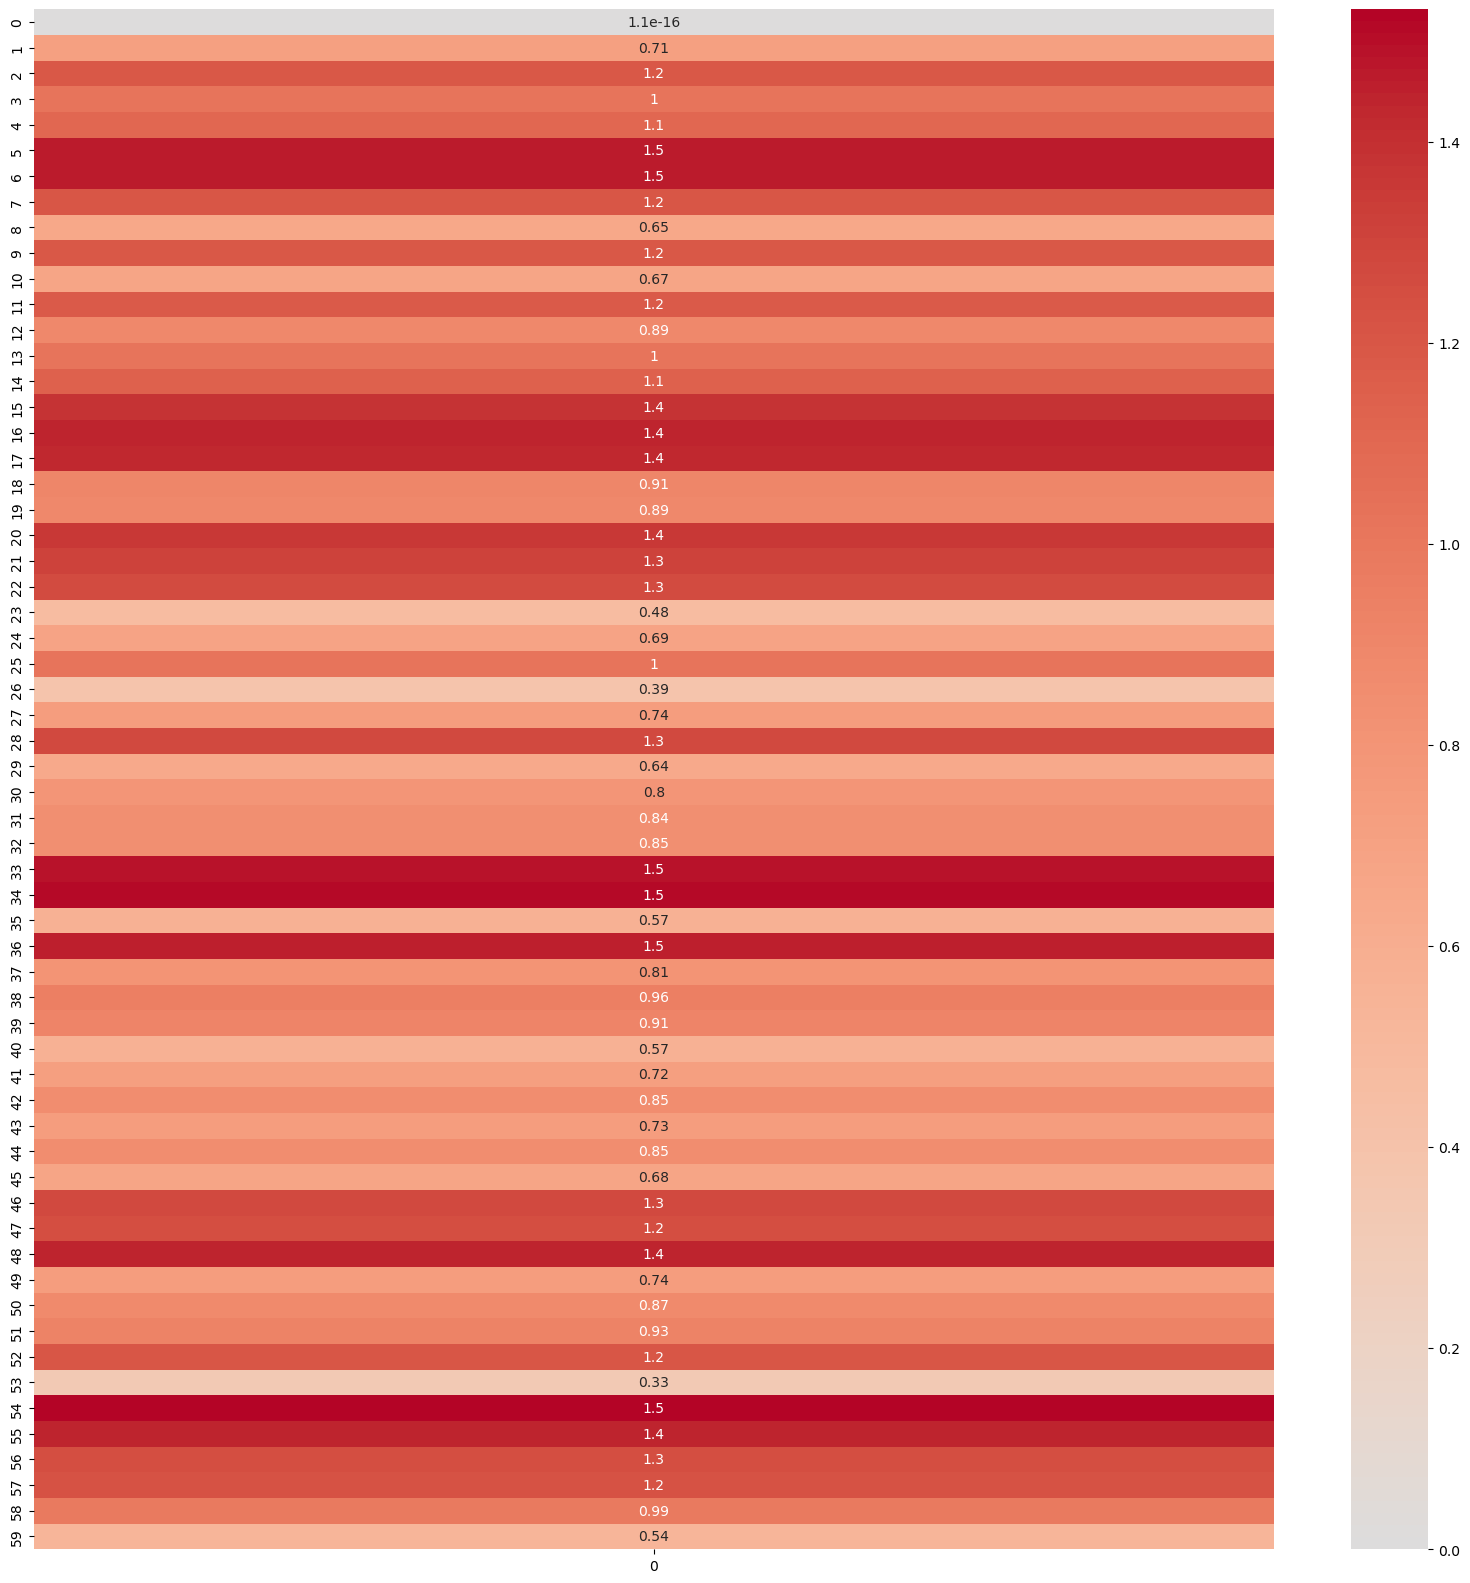

In [44]:
# Calculate cosine similarity
rand_df_num_scl_cosim = cosine_similarity(rand_df_num_scl)

# Convert cosine similarity to DataFrame
rand_df_num_scl_cosim_df = pd.DataFrame(rand_df_num_scl_cosim)

# Calc cosine distance
rand_df_num_scl_codis_df = 1 - rand_df_num_scl_cosim_df

plt.figure(figsize=(20, 20))
sns.heatmap(rand_df_num_scl_codis_df.iloc[:, [0]], cmap='coolwarm', annot=True, center = 0)
plt.show()


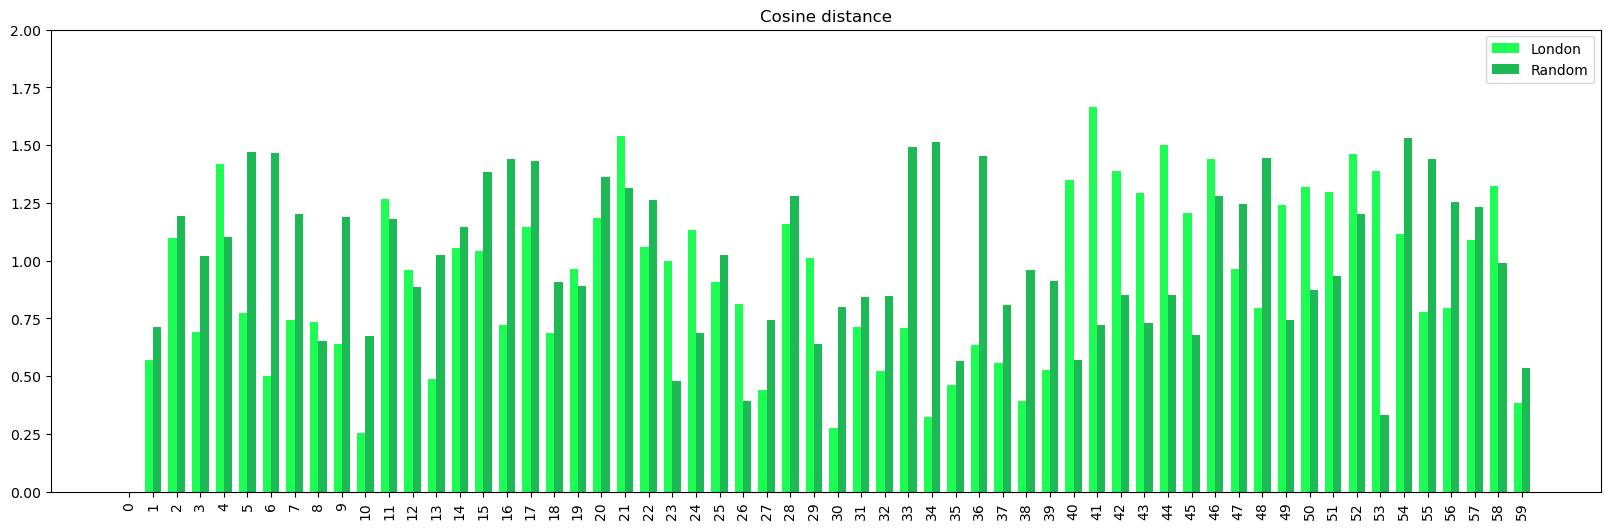

In [45]:
bar_width = 0.35

x_indices = np.arange(len(ldn_df_num_scl_codis_df.iloc[:, [0]]))

# Define the y-axis range
y_min = 0
y_max = 2

plt.figure(figsize=(20, 6))
plt.bar(x_indices - bar_width/2, ldn_df_num_scl_codis_df.iloc[:, [0]][0], color='#1DFD54', width=bar_width, label='London') 
plt.bar(x_indices + bar_width/2, rand_df_num_scl_codis_df.iloc[:, [0][0]], color='#1DB954', width=bar_width, label='Random') 

# Set the y-axis range
plt.ylim(y_min, y_max)

# Set x-axis labels
plt.xticks(x_indices, x_indices, rotation=90)
plt.legend()
plt.title('Cosine distance')
plt.show()

In [46]:
codis_ldn_avg = ldn_df_num_scl_codis_df.iloc[:, [0]].sum() / len(ldn_df_num_scl_codis_df.iloc[:, [0]])
codis_ldn_avg
# Average cosine distance ldn

0    0.91453
dtype: float64

In [47]:
codis_rand_avg = rand_df_num_scl_codis_df.iloc[:, [0]].sum() / len(rand_df_num_scl_codis_df.iloc[:, [0]])
codis_rand_avg
# Average cosine distance rand

0    0.995977
dtype: float64

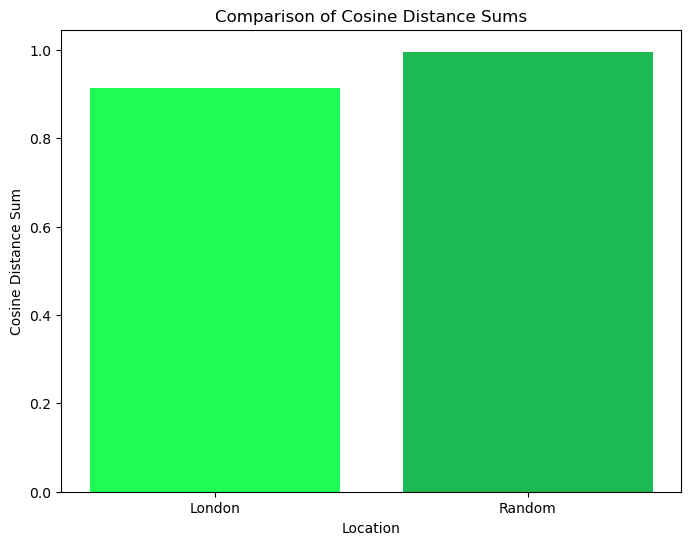

In [48]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.bar(['London', 'Random'], [codis_ldn_avg[0], codis_rand_avg[0]], color=['#1DFD54', '#1DB954'])
plt.xlabel('Location')
plt.ylabel('Cosine Distance Sum')
plt.title('Comparison of Cosine Distance Sums')
plt.show()


### ***STATUS SO FAR...***
- Initial EDA shows promise, we have a relatively clean dataset of good size and quality.
- Given the brief (playlist recommendation) it is essential to lock down model and approach asap next as this will lead any further cleaning, pre-processing and feature engineering. (It's not as simple as identifying a target y in the already existing dataset)
- In addition to deciding on the model approach and process we need to lock down location playlists for testing asap whether that be via the API or from a carefully selected subset of our main dataset. (Shortlist; London, Manchester, Ibiza, NYC, Kingston, Berlin, LA)
- Once both of these things are done we need to finalise cleaning & begin pre-processing, feature engineering and the baseline modelling phase keeping an eye on the final product and what's acheivable.

#### <<< ***See 00-b3-spotify-api-access.ipynb for code accessing the data that will act as our sound profile in addition to our manually selected London profile above*** >>>

### 5. **Importing our sound profiles**

#### Import sound profiles...

**London sound** (we already have this)

In [49]:
london_sound.head(3)


artist_name    track_name     genre  year  duration_ms    tempo  \
623677        Blur  Girls & Boys  alt-rock  2000       259387  120.048   
623895        Blur      Parklife  alt-rock  2000       187040  138.391   
752183        Blur     Good Song  alt-rock  2003       187680  168.544   

        time_signature  key   mode  loudness  popularity  liveness  \
623677               4    7  Minor    -8.354          67    0.0601   
623895               4    4  Major    -6.905          55    0.3280   
752183               4    5  Major    -9.113          53    0.1880   

        acousticness  speechiness  instrumentalness  energy  valence  \
623677       0.00986       0.0315             0.000   0.875    0.899   
623895       0.15400       0.0606             0.000   0.877    0.749   
752183       0.21300       0.0286             0.538   0.493    0.719   

        danceability                track_id  
623677         0.693  5CeL9C3bsoe4yzYS1Qz8cw  
623895         0.632  3mqRLlD9j92BBv1ueFhJ1l  
752183         0.651  75WFyYrXPMAWyN6jOBB7IC

**Manchester sound**

In [50]:
df_man = pd.read_csv("../data/Manchester playlist_tracks.csv")
df_man.head(3)

artist_name                               track_name             genre  \
0  The Stone Roses           I Wanna Be Adored - Remastered           britpop   
1            Oasis                 Don't Look Back In Anger        beatlesque   
2     Joy Division  Love Will Tear Us Apart - 2020 Remaster  alternative rock   

   year  duration_ms    tempo  time_signature  key  mode  loudness  \
0  1989       292800  112.596               4    4     0    -9.158   
1  1995       287827  164.036               4    0     1    -3.645   
2  1980       208453  146.924               4    2     1    -7.458   

   popularity  liveness  acousticness  speechiness  instrumentalness  energy  \
0          67    0.2280      0.012000       0.0273          0.213000   0.862   
1          67    0.0968      0.026000       0.0710          0.000007   0.917   
2          72    0.1270      0.000541       0.0379          0.765000   0.923   

   valence  danceability                track_id  
0    0.590         0.494  758wEKVqfYopJIHYWdLVd4  
1    0.206         0.349  7ppPZa3TRUSGKaks9wH7VT  
2    0.899         0.527  34iOH7LY3vme5rQxsVILZ4

**Ibiza sound**

In [51]:
df_bza = pd.read_csv("../data/Ibiza playlist_tracks.csv")
df_bza.head(3)

artist_name                                   track_name  \
0             Robert Miles                                     Children   
1  Everything But The Girl      Missing - Todd Terry Remix / Radio Edit   
2            Nightcrawlers  Push The Feeling On - Mk Dub Revisited Edit   

          genre  year  duration_ms    tempo  time_signature  key  mode  \
0  dream trance  1996       243267  137.064               4    0     1   
1  new wave pop  2002       235027  123.509               4    9     0   
2   disco house  1995       243160  123.017               4    6     0   

   loudness  popularity  liveness  acousticness  speechiness  \
0   -10.761          71    0.0625      0.000298       0.0337   
1    -6.539          60    0.0570      0.021700       0.0296   
2   -13.108          68    0.1860      0.028000       0.0319   

   instrumentalness  energy  valence  danceability                track_id  
0           0.81700   0.755    0.387         0.604  4wtR6HB3XekEengMX17cpc  
1           0.00357   0.853    0.652         0.739  1IsvXZXAV9EBC4hBKW6yDN  
2           0.00002   0.500    0.833         0.793  1EWsVHU4FNAdtN4R8FETag

**Berlin sound**

In [52]:
df_ber = pd.read_csv("../data/Berlin playlist_tracks.csv")
df_ber.head(3)

artist_name   track_name            genre  year  duration_ms    tempo  \
0         Miyagi     Illusion  deep euro house  2015       369907  120.008   
1    Funkin Matt      Phoenix              NaN  2017       229808  121.938   
2  Boris Brejcha  Lost Memory     german house  2008       462720  124.999   

   time_signature  key  mode  loudness  popularity  liveness  acousticness  \
0               4    1     1   -15.504           0    0.1190        0.0677   
1               4    4     0    -8.632           0    0.0848        0.0367   
2               3   11     1   -11.520          46    0.1110        0.0146   

   speechiness  instrumentalness  energy  valence  danceability  \
0       0.1230             0.923   0.375    0.640         0.815   
1       0.0592             0.862   0.640    0.268         0.787   
2       0.0756             0.910   0.459    0.137         0.876   

                 track_id  
0  4Jz8VHqvPVmE9tP638Yh0v  
1  0klyFbEQjo8m0ndeiVtqPF  
2  76lT30VRv09h5MQp5snmsb

**Kingston sound**

In [53]:
df_kng = pd.read_csv("../data/Kingston playlist_tracks.csv")
df_kng.head(3)

artist_name                            track_name  \
0  Bob Marley & The Wailers                              One Love   
1              Sister Nancy                               Bam Bam   
2          Althea And Donna  Uptown Top Ranking - Remastered 2001   

             genre  year  duration_ms    tempo  time_signature  key  mode  \
0           reggae  2012       172813   76.550               4   10     1   
1  dancehall queen  1982       196507  165.998               4    5     1   
2              dub  1978       229160   82.439               4    7     1   

   loudness  popularity  liveness  acousticness  speechiness  \
0    -8.807           0    0.0432        0.0349        0.335   
1    -6.070           0    0.2480        0.8250        0.153   
2    -7.971          64    0.2070        0.0477        0.173   

   instrumentalness  energy  valence  danceability                track_id  
0           0.00000   0.543    0.926         0.715  7cRTzS9N5Mn25ZZkzmp6Uy  
1           0.01780   0.605    0.709         0.722  7cKLOenzViwzoHJWciMIrj  
2           0.00108   0.522    0.790         0.886  34zWZOSpU2V1ab0PiZCcv4

**NYC sound**

In [54]:
df_nyc = pd.read_csv("../data/NYC playlist_tracks.csv")
df_nyc.head(3)

artist_name            track_name               genre  year  duration_ms  \
0         JAY-Z  Empire State Of Mind  east coast hip hop  2009       276920   
1  Taylor Swift   Welcome To New York                 pop  2014       212600   
2      Lil' Kim           Lighters Up           dance pop  2005       262640   

     tempo  time_signature  key  mode  loudness  popularity  liveness  \
0  173.585               4   11     1    -1.538          84     0.460   
1  117.024               4    7     1    -4.807          59     0.304   
2   91.727               4    9     1    -6.310          46     0.107   

   acousticness  speechiness  instrumentalness  energy  valence  danceability  \
0       0.02950       0.3920          0.000000   0.956    0.811         0.491   
1       0.03800       0.0324          0.000002   0.634    0.615         0.793   
2       0.00494       0.3960          0.000000   0.766    0.714         0.624   

                 track_id  
0  2igwFfvr1OAGX9SKDCPBwO  
1  6qnM0XXPZOINWA778uNqQ9  
2  4eihdGG3Tga3oFq4yqCDeL

**LA sound**

We've got two playlists here which we'll concat for a slightly better representation and to increase to a 50 track minimum.

In [55]:
df_laone = pd.read_csv("../data/LA_1 playlist_tracks.csv")
df_laone.head(3)

artist_name           track_name         genre  year  \
0  Dick Dale & His Del-Tones             Misirlou    surf music  1959   
1            Kool & The Gang        Jungle Boogie         disco  1994   
2                   Al Green  Let's Stay Together  classic soul  1972   

   duration_ms    tempo  time_signature  key  mode  loudness  popularity  \
0       134933  172.725               4    4     1    -9.181          53   
1       185733  106.501               4    0     1    -9.428          40   
2       199396  101.954               4    7     0   -10.702          78   

   liveness  acousticness  speechiness  instrumentalness  energy  valence  \
0    0.4300       0.00933       0.0516          0.428000   0.871    0.604   
1    0.3560       0.08150       0.1270          0.000004   0.862    0.666   
2    0.0541       0.58200       0.0526          0.011000   0.401    0.514   

   danceability                track_id  
0         0.296  67arMcWgoOQhSrF3PC5ajX  
1         0.774  25lQDEclLoUa0dZD25VRXV  
2         0.756  63xdwScd1Ai1GigAwQxE8y

In [56]:
df_laone.shape

(42, 19)

In [57]:
df_latwo = pd.read_csv("../data/LA_2 playlist_tracks.csv")
df_latwo.head(3)

artist_name                                track_name  \
0         The Beach Boys  California Girls - Remix/Remastered 2001   
1  The Mamas & The Papas      California Dreamin' - Single Version   
2                America                           Ventura Highway   

          genre  year  duration_ms    tempo  time_signature  key  mode  \
0   baroque pop  1965       160360  116.599               4   11     1   
1  classic rock  1966       162373  112.367               4    1     0   
2    album rock  1972       211387  130.771               4    2     1   

   loudness  popularity  liveness  acousticness  speechiness  \
0    -6.069          59    0.1590         0.471       0.0296   
1    -9.786          81    0.0533         0.352       0.0345   
2   -10.205          73    0.0630         0.223       0.0290   

   instrumentalness  energy  valence  danceability                track_id  
0          0.000000   0.620    0.713         0.503  6bJuuCtXYiwOcKT9s8uRh8  
1          0.000000   0.608    0.637         0.552  4s6LhHAV5SEsOV0lC2tjvJ  
2          0.000206   0.581    0.818         0.673  4IU1RL4BKvFyXtbTwaHAvW

In [58]:
df_latwo.shape

(29, 19)

In [59]:
df_la = pd.concat([df_laone, df_latwo], axis = 0)
df_la.reset_index(inplace=True)
df_la.drop(columns="index", inplace=True)
df_la.tail(3)

artist_name                          track_name  \
68  A Tribe Called Quest      I Left My Wallet in El Segundo   
69          Tony Bennett  (I Left My Heart) In San Francisco   
70          Led Zeppelin      Going to California - Remaster   

                genre  year  duration_ms    tempo  time_signature  key  mode  \
68  conscious hip hop  1990       246827   99.032               4    7     1   
69    adult standards  1962       170960  128.065               4    0     1   
70         album rock  1971       212161   78.044               4    2     1   

    loudness  popularity  liveness  acousticness  speechiness  \
68    -6.481          49    0.0866         0.383       0.2380   
69   -17.583          60    0.1690         0.955       0.0332   
70   -15.913          71    0.0867         0.943       0.0333   

    instrumentalness  energy  valence  danceability                track_id  
68          0.000000   0.825    0.881         0.817  15Xdlu0QaiEy3YFTf4xpUA  
69          0.000004   0.078    0.125         0.313  1bYItjcPRtxZs6Ir71O5RB  
70          0.045000   0.265    0.522         0.503  70gbuMqwNBE2Y5rkQJE9By

#### Conduct sound profile checks and cleaning...

**DF recap**
- df
    - london_sound
- df_man
- df_bza
- df_ber
- df_kng
- df_nyc
- df_la


Check shape...

In [60]:
print(df.shape)
print(london_sound.shape)
print(df_man.shape)
print(df_bza.shape)
print(df_ber.shape)
print(df_kng.shape)
print(df_nyc.shape)
print(df_la.shape)

(1159748, 19)
(60, 19)
(50, 19)
(482, 19)
(219, 19)
(76, 19)
(50, 19)
(71, 19)


Check columns...

In [61]:
print(df.columns == london_sound.columns)
print(df.columns == df_man.columns)
print(df.columns == df_bza.columns)
print(df.columns == df_ber.columns)
print(df.columns == df_kng.columns)
print(df.columns == df_nyc.columns)
print(df.columns == df_la.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]


#### Manchester processing and cleaning...

Duplicates.

In [62]:
# Check duplicates - zero found
df_man.duplicated().value_counts()


False    50
Name: count, dtype: int64

NaNs.

In [63]:
# Check nans - one genre NAN
df_man.isna().sum()

artist_name         0
track_name          0
genre               1
year                0
duration_ms         0
tempo               0
time_signature      0
key                 0
mode                0
loudness            0
popularity          0
liveness            0
acousticness        0
speechiness         0
instrumentalness    0
energy              0
valence             0
danceability        0
track_id            0
dtype: int64

In [64]:
# Check nans - track is a cover, we can drop but let's search for the original to replace as we really need minimum 50 tracks per playlist
df_man[df_man["genre"].isna()]

artist_name                                         track_name genre  \
7  That 70s Hit Band  He Ain't Heavy, He's My Brother (From "The Ult...   NaN   

   year  duration_ms   tempo  time_signature  key  mode  loudness  popularity  \
7  2018       254560  76.097               4    7     1    -15.01          48   

   liveness  acousticness  speechiness  instrumentalness  energy  valence  \
7     0.451         0.266       0.0324           0.00001   0.239    0.245   

   danceability                track_id  
7         0.364  2Lv1AipuASgrplLQAYphzQ

In [65]:
# Drop track
df_man.drop(index=7, inplace=True)
df_man.shape

(49, 19)

Column types.

In [66]:
# Process df_man so column types to align with df..
# Change "year" datatype to string (categorical)
df_man["year"] = df_man["year"].astype(str)

# Change "mode" datatype to string (categorical)
df_man['mode'] = np.where(df_man['mode'] == 1, 'Major', 'Minor')


In [67]:
# Check
df_man.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 49
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       49 non-null     object 
 1   track_name        49 non-null     object 
 2   genre             49 non-null     object 
 3   year              49 non-null     object 
 4   duration_ms       49 non-null     int64  
 5   tempo             49 non-null     float64
 6   time_signature    49 non-null     int64  
 7   key               49 non-null     int64  
 8   mode              49 non-null     object 
 9   loudness          49 non-null     float64
 10  popularity        49 non-null     int64  
 11  liveness          49 non-null     float64
 12  acousticness      49 non-null     float64
 13  speechiness       49 non-null     float64
 14  instrumentalness  49 non-null     float64
 15  energy            49 non-null     float64
 16  valence           49 non-null     float64
 17  danc

Continue to replace NaN.

In [68]:
# Create a filter for the actual artist
hollies = df["artist_name"] == 'The Hollies'

# Find track in question and get index - let's take the latest remastered version (index 149221)
track_index = df[hollies][df[hollies]['track_name'].str.contains("He Ain't")].index[0]  # Get the index of the track

# Extract row
newtrack = pd.DataFrame(df.loc[track_index]).T

# Ensure the data types match with df_man
newtrack = newtrack.astype(df_man.dtypes)

# Add to manchester df
df_man = pd.concat([df_man, newtrack], ignore_index=True)

df_man.tail(3)

artist_name                      track_name       genre  year  \
47  Richard Ashcroft           A Song For The Lovers     britpop  2000   
48       Johnny Marr                      Easy Money     britpop  2014   
49       The Hollies  He Ain't Heavy He's My Brother  psych-rock  2012   

    duration_ms    tempo  time_signature  key   mode  loudness  popularity  \
47       326160  154.127               4    9  Minor    -6.668          53   
48       243189  134.571               4    6  Minor    -4.053          45   
49       258800   75.754               4    7  Major   -13.195           8   

    liveness  acousticness  speechiness  instrumentalness  energy  valence  \
47    0.1140      0.039700       0.0475          0.001050   0.923    0.490   
48    0.0587      0.000712       0.0441          0.003960   0.962    0.844   
49    0.1830      0.444000       0.0303          0.000365   0.275    0.253   

    danceability                track_id  
47         0.389  7a90gal9tr3yS8bEXUvu8D  
48         0.509  00OguRNWLi6uPAROsZgNzT  
49         0.319  30driT6wbyoNzw1OfZXd21

In [69]:
# check no NANS introduced
df_man.isna().sum().sum()

0

#### Ibiza processing and cleaning...

Duplicates.

In [70]:
# Check duplicates - zero found
df_bza.duplicated().value_counts()

False    482
Name: count, dtype: int64

NaNs.

In [71]:
# Check nans - 53 genres NAN
df_bza.isna().sum()

artist_name          0
track_name           0
genre               53
year                 0
duration_ms          0
tempo                0
time_signature       0
key                  0
mode                 0
loudness             0
popularity           0
liveness             0
acousticness         0
speechiness          0
instrumentalness     0
energy               0
valence              0
danceability         0
track_id             0
dtype: int64

In [72]:
# Check nans - we've got enough tracks we can drop all these although there's a couple we can update quickly
df_bza[df_bza["genre"].isna()]

# Update known
df_bza.loc[74, "genre"] = "house"
df_bza.loc[435, "genre"] = "electronic"
df_bza.loc[473, "genre"] = "house"

# Check updated
df_bza[df_bza["genre"].isna()].shape

(50, 19)

In [73]:
# Get NaN index to drop
nan_drop_index = df_bza[df_bza["genre"].isna()].index

# Drop remaining NaN
# Drop track
df_bza.drop(index=nan_drop_index, inplace=True)
df_bza.shape

(432, 19)

Column types.

In [74]:
# Process df_bza so column types to align with df..
# Change "year" datatype to string (categorical)
df_bza["year"] = df_bza["year"].astype(str)

# Change "mode" datatype to string (categorical)
df_bza['mode'] = np.where(df_bza['mode'] == 1, 'Major', 'Minor')

df_bza.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 0 to 481
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       432 non-null    object 
 1   track_name        432 non-null    object 
 2   genre             432 non-null    object 
 3   year              432 non-null    object 
 4   duration_ms       432 non-null    int64  
 5   tempo             432 non-null    float64
 6   time_signature    432 non-null    int64  
 7   key               432 non-null    int64  
 8   mode              432 non-null    object 
 9   loudness          432 non-null    float64
 10  popularity        432 non-null    int64  
 11  liveness          432 non-null    float64
 12  acousticness      432 non-null    float64
 13  speechiness       432 non-null    float64
 14  instrumentalness  432 non-null    float64
 15  energy            432 non-null    float64
 16  valence           432 non-null    float64
 17  da

#### Berlin processing and cleaning...

Duplicates.

In [75]:
# Check duplicates - two found
df_ber.duplicated().value_counts()

False    217
True       2
Name: count, dtype: int64

In [76]:
# Check and confirm duplicates
df_ber[df_ber.duplicated()]

artist_name               track_name              genre  year  \
76          Ante Perry  Attacke - Dayne S Remix  german tech house  2017   
86  Township Rebellion                Aphrodite    deep euro house  2017   

    duration_ms    tempo  time_signature  key  mode  loudness  popularity  \
76       377705  121.989               4    7     1   -15.139          16   
86       514888  119.994               4    0     0    -8.407          37   

    liveness  acousticness  speechiness  instrumentalness  energy  valence  \
76    0.0634       0.00477       0.0815             0.651   0.513    0.304   
86    0.0694       0.00230       0.0539             0.844   0.797    0.194   

    danceability                track_id  
76         0.818  351ebM3aFR0ZN7DWqSh1TJ  
86         0.713  7GxlVNWDgdemrtZoVj62ce

In [77]:
# Drop duplicates
dup_drop = df_ber[df_ber.duplicated()].index
df_ber.drop(index=dup_drop, inplace=True)

In [78]:
# Check dropped
df_ber.duplicated().value_counts()

False    217
Name: count, dtype: int64

NaNs.

In [79]:
# Check nans - 15 genres NAN
df_ber.isna().sum()

artist_name          0
track_name           0
genre               15
year                 0
duration_ms          0
tempo                0
time_signature       0
key                  0
mode                 0
loudness             0
popularity           0
liveness             0
acousticness         0
speechiness          0
instrumentalness     0
energy               0
valence              0
danceability         0
track_id             0
dtype: int64

In [80]:
# Check nans - we've got enough tracks so we can drop these
df_ber[df_ber["genre"].isna()]


artist_name                            track_name genre  year  \
1           Funkin Matt                               Phoenix   NaN  2017   
31   Gottlieb Scheppert                            Don't Know   NaN  2016   
48      Johannes Brecht  Voix Grave - Johannes Brecht Version   NaN  2016   
51         Musicoleptik                          Fool Me Once   NaN  2016   
85   Ferdinand Dreyssig      Coeur De La Nuit - Worakls Remix   NaN  2014   
111              Kyrill                      Colourless Water   NaN  2015   
121        Dirk Sid Eno                      Vergissmeinnicht   NaN  2016   
125              GHEIST                             Salvation   NaN  2017   
138          Kid Simius              Flashback - Niconé Remix   NaN  2018   
148               Bondi              Land Of The Blind - Edit   NaN  2018   
151        Dirk Sid Eno                    Morgens In Odonien   NaN  2015   
177            VA MO LA                           Sun Is Dark   NaN  2021   
190        Dirk Sid Eno                            Katzentanz   NaN  2016   
201       Victor Pilava                       Smoke & Thunder   NaN  2018   
211             Blossom                             Super Bad   NaN  2021   

     duration_ms    tempo  time_signature  key  mode  loudness  popularity  \
1         229808  121.938               4    4     0    -8.632           0   
31        338361  120.002               4    7     1   -11.212          27   
48        598000  123.994               4    7     0   -11.904           0   
51        425230  118.002               4   11     0   -10.470           0   
85        557680  124.005               4    2     0   -11.919          39   
111       467923  120.998               4    8     1   -10.843          28   
121       486600  122.999               4    4     0   -10.133           0   
125       515831  123.999               4   11     1    -8.370          20   
138       486055  120.001               4    7     1    -9.207           0   
148       238142  122.015               4    2     0   -10.439          41   
151       456000  120.012               4    4     0    -8.200           0   
177       336774  123.992               4    6     0    -7.618          28   
190       415270  121.995               4    2     1    -9.713          13   
201       363886  124.021               4    7     1    -7.884          13   
211       169219  127.907               4    9     0    -4.137          19   

     liveness  acousticness  speechiness  instrumentalness  energy  valence  \
1      0.0848      0.036700       0.0592           0.86200   0.640   0.2680   
31     0.1120      0.053900       0.0678           0.87700   0.405   0.6010   
48     0.1580      0.000927       0.0479           0.81400   0.805   0.3280   
51     0.6010      0.067100       0.0528           0.88200   0.720   0.1440   
85     0.0930      0.002460       0.0460           0.90100   0.375   0.2390   
111    0.0890      0.061800       0.0434           0.80800   0.568   0.1600   
121    0.0981      0.055000       0.0348           0.85200   0.673   0.1770   
125    0.0906      0.000710       0.0513           0.57900   0.582   0.3590   
138    0.0921      0.077500       0.0461           0.77300   0.828   0.3330   
148    0.0541      0.036000       0.2050           0.00512   0.463   0.4260   
151    0.1100      0.032200       0.0374           0.91400   0.638   0.2290   
177    0.3950      0.014000       0.0469           0.86800   0.500   0.1080   
190    0.1060      0.005820       0.0349           0.89800   0.625   0.0324   
201    0.0262      0.000343       0.0747           0.90200   0.583   0.3740   
211    0.3290      0.007730       0.0935           0.03620   0.870   0.7080   

     danceability                track_id  
1           0.787  0klyFbEQjo8m0ndeiVtqPF  
31          0.867  4ZdAbuwV2enyv00Dc1Shdb  
48          0.713  1XJQ0Sjvo2FPNC1mNUpmMO  
51          0.809  5idUIYwlhM1mt3YylOQ1t6  
85          0.818  1cVPTlLw6zsXwggFrMQ6aH  
1

In [81]:
# Get NaN index to drop
nan_drop_index = df_ber[df_ber["genre"].isna()].index

# Drop remaining NaN
# Drop track
df_ber.drop(index=nan_drop_index, inplace=True)
df_ber.shape

(202, 19)

In [82]:
# Process df_ber so column types to align with df..
# Change "year" datatype to string (categorical)
df_ber["year"] = df_ber["year"].astype(str)

# Change "mode" datatype to string (categorical)
df_ber['mode'] = np.where(df_ber['mode'] == 1, 'Major', 'Minor')

df_ber.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 0 to 218
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       202 non-null    object 
 1   track_name        202 non-null    object 
 2   genre             202 non-null    object 
 3   year              202 non-null    object 
 4   duration_ms       202 non-null    int64  
 5   tempo             202 non-null    float64
 6   time_signature    202 non-null    int64  
 7   key               202 non-null    int64  
 8   mode              202 non-null    object 
 9   loudness          202 non-null    float64
 10  popularity        202 non-null    int64  
 11  liveness          202 non-null    float64
 12  acousticness      202 non-null    float64
 13  speechiness       202 non-null    float64
 14  instrumentalness  202 non-null    float64
 15  energy            202 non-null    float64
 16  valence           202 non-null    float64
 17  da

#### Kingston processing and cleaning...

In [83]:
# Check duplicates - zero found
df_kng.duplicated().value_counts()

False    76
Name: count, dtype: int64

In [84]:
# Check nans - one genre NAN
df_kng.isna().sum()

artist_name         0
track_name          0
genre               1
year                0
duration_ms         0
tempo               0
time_signature      0
key                 0
mode                0
loudness            0
popularity          0
liveness            0
acousticness        0
speechiness         0
instrumentalness    0
energy              0
valence             0
danceability        0
track_id            0
dtype: int64

In [85]:
# Check nans - we know the genre of this one so let's update quickly
df_kng[df_kng["genre"].isna()]
df_kng.loc[37, "genre"] = "reggae"

# Check updated
df_kng.isna().sum().sum()


0

In [86]:
# Process df_kng so column types to align with df..
# Change "year" datatype to string (categorical)
df_kng["year"] = df_kng["year"].astype(str)

# Change "mode" datatype to string (categorical)
df_kng['mode'] = np.where(df_kng['mode'] == 1, 'Major', 'Minor')

df_kng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       76 non-null     object 
 1   track_name        76 non-null     object 
 2   genre             76 non-null     object 
 3   year              76 non-null     object 
 4   duration_ms       76 non-null     int64  
 5   tempo             76 non-null     float64
 6   time_signature    76 non-null     int64  
 7   key               76 non-null     int64  
 8   mode              76 non-null     object 
 9   loudness          76 non-null     float64
 10  popularity        76 non-null     int64  
 11  liveness          76 non-null     float64
 12  acousticness      76 non-null     float64
 13  speechiness       76 non-null     float64
 14  instrumentalness  76 non-null     float64
 15  energy            76 non-null     float64
 16  valence           76 non-null     float64
 17 

#### New York processing and cleaning...

In [87]:
# Check duplicates - zero found
df_nyc.duplicated().value_counts()

False    50
Name: count, dtype: int64

In [88]:
# Check nans - 5 NAN years
df_nyc.isna().sum()

artist_name         0
track_name          0
genre               0
year                0
duration_ms         0
tempo               0
time_signature      0
key                 0
mode                0
loudness            0
popularity          0
liveness            0
acousticness        0
speechiness         0
instrumentalness    0
energy              0
valence             0
danceability        0
track_id            0
dtype: int64

In [89]:
# Check NaNs
df_nyc[df_nyc["year"].isna()]

Empty DataFrame
Columns: [artist_name, track_name, genre, year, duration_ms, tempo, time_signature, key, mode, loudness, popularity, liveness, acousticness, speechiness, instrumentalness, energy, valence, danceability, track_id]
Index: []

In [90]:
# Only 5 so let's google and replace

# Beastie Boys	No Sleep Till Brooklyn - 1986
df_nyc.loc[8, 'year'] = '1986'

# Billy Joel	New York State of Mind - 1976
df_nyc.loc[25, 'year'] = '1976'

# LL COOL J	Loungin (Who Do Ya Luv) - Remix - 1996
df_nyc.loc[34, 'year'] = '1996'

# The Wallflowers	6th Avenue Heartach - 1996
df_nyc.loc[38, 'year'] = '1996'

# Simon & Garfunkel	Bleecker Street - 1964
df_nyc.loc[40, 'year'] = '1964'

In [91]:
# Check NaNs
df_nyc.isna().sum()

artist_name         0
track_name          0
genre               0
year                0
duration_ms         0
tempo               0
time_signature      0
key                 0
mode                0
loudness            0
popularity          0
liveness            0
acousticness        0
speechiness         0
instrumentalness    0
energy              0
valence             0
danceability        0
track_id            0
dtype: int64

In [92]:
# Process df_nyc so column types to align with df..
# Change "year" datatype to string (categorical)
df_nyc["year"] = df_nyc["year"].astype(str)

# Change "mode" datatype to string (categorical)
df_nyc['mode'] = np.where(df_nyc['mode'] == 1, 'Major', 'Minor')

df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       50 non-null     object 
 1   track_name        50 non-null     object 
 2   genre             50 non-null     object 
 3   year              50 non-null     object 
 4   duration_ms       50 non-null     int64  
 5   tempo             50 non-null     float64
 6   time_signature    50 non-null     int64  
 7   key               50 non-null     int64  
 8   mode              50 non-null     object 
 9   loudness          50 non-null     float64
 10  popularity        50 non-null     int64  
 11  liveness          50 non-null     float64
 12  acousticness      50 non-null     float64
 13  speechiness       50 non-null     float64
 14  instrumentalness  50 non-null     float64
 15  energy            50 non-null     float64
 16  valence           50 non-null     float64
 17 

#### LA processing and cleaning...

In [93]:
# Check duplicates - one found
df_la.duplicated().value_counts()

False    70
True      1
Name: count, dtype: int64

In [94]:
# Check and confirm duplicates
df_la[df_la.duplicated()]


artist_name                        track_name       genre  year  \
47      Eagles  Hotel California - 2013 Remaster  album rock  1976   

    duration_ms    tempo  time_signature  key  mode  loudness  popularity  \
47       391376  147.125               4    2     1    -9.484          85   

    liveness  acousticness  speechiness  instrumentalness  energy  valence  \
47    0.0575       0.00574        0.027          0.000494   0.508    0.609   

    danceability                track_id  
47         0.579  40riOy7x9W7GXjyGp4pjAv

In [95]:
# Drop duplicates
dup_drop = df_la[df_la.duplicated()].index
df_la.drop(index=dup_drop, inplace=True)

In [96]:
# Check dropped
df_la.duplicated().value_counts()

False    70
Name: count, dtype: int64

In [97]:
# Check nans - 4 genres NAN
df_la.isna().sum()

artist_name         0
track_name          0
genre               4
year                0
duration_ms         0
tempo               0
time_signature      0
key                 0
mode                0
loudness            0
popularity          0
liveness            0
acousticness        0
speechiness         0
instrumentalness    0
energy              0
valence             0
danceability        0
track_id            0
dtype: int64

In [98]:
# Check nans - one known to update rest to be dropped
df_la[df_la["genre"].isna()]

artist_name                                         track_name genre  \
7      Maria McKee  If Love Is A Red Dress (Hang Me In Rags) - Aco...   NaN   
24         E A Ski                                 Blast If I Have To   NaN   
48      Soulkid #1                        (More Bounce In) California   NaN   
62  Phantom Planet                       California - Tchad Blake Mix   NaN   

    year  duration_ms    tempo  time_signature  key  mode  loudness  \
7   1994       295667   92.031               3    2     1   -13.481   
24  1995       240360   89.153               4    2     1    -6.505   
48  2006       229960  112.020               4    7     1    -4.376   
62  2002       193933  158.459               4    4     1    -7.305   

    popularity  liveness  acousticness  speechiness  instrumentalness  energy  \
7           36     0.138        0.9540       0.0274          0.000510   0.144   
24          35     0.102        0.1460       0.2910          0.000000   0.769   
48           0     0.476        0.0149       0.0326          0.000000   0.690   
62          62     0.109        0.0387       0.0407          0.000054   0.805   

    valence  danceability                track_id  
7     0.123         0.489  5b7H6zxDzyVyIt77HfcKs8  
24    0.483         0.712  6ksnbo8hfr1NOIobckeKr4  
48    0.934         0.882  7b5EiEo7MasDKSElexUmkB  
62    0.324         0.400  497Fkp3gRiGrRMoqBTDudr

In [99]:
# Update known
df_la.loc[62, "genre"] = "alt-rock"

# Check updated
df_la[df_la["genre"].isna()].shape

# Get NaN index to drop
nan_drop_index = df_la[df_la["genre"].isna()].index

# Drop remaining NaN
# Drop track
df_la.drop(index=nan_drop_index, inplace=True)
df_la.shape


(67, 19)

In [100]:
df_la.isna().sum().sum()

0

In [101]:
# Process df_la so column types to align with df..
# Change "year" datatype to string (categorical)
df_la["year"] = df_la["year"].astype(str)

# Change "mode" datatype to string (categorical)
df_la['mode'] = np.where(df_la['mode'] == 1, 'Major', 'Minor')

df_la.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 0 to 70
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       67 non-null     object 
 1   track_name        67 non-null     object 
 2   genre             67 non-null     object 
 3   year              67 non-null     object 
 4   duration_ms       67 non-null     int64  
 5   tempo             67 non-null     float64
 6   time_signature    67 non-null     int64  
 7   key               67 non-null     int64  
 8   mode              67 non-null     object 
 9   loudness          67 non-null     float64
 10  popularity        67 non-null     int64  
 11  liveness          67 non-null     float64
 12  acousticness      67 non-null     float64
 13  speechiness       67 non-null     float64
 14  instrumentalness  67 non-null     float64
 15  energy            67 non-null     float64
 16  valence           67 non-null     float64
 17  danc

#### Prepare to join to main df...

In [102]:
# Check total number of tracks to be added
dfsounds_list = [df_man, df_bza, df_ber, df_kng, df_nyc, df_la]
count = 0
for sound in dfsounds_list:
    count += sound.shape[0]
print(f"Total tracks to add: {count} (not including london_sound)")

Total tracks to add: 877 (not including london_sound)


In [103]:
# Get track IDs - Manchester
df_man_tracks = list(df_man["track_id"])

# Get track IDs - Ibiza
df_bza_tracks = list(df_bza["track_id"])

# Get track IDs - Berlin
df_ber_tracks = list(df_ber["track_id"])

# Get track IDs - Kingston
df_kng_tracks = list(df_kng["track_id"])

# Get track IDs - NYC
df_nyc_tracks = list(df_nyc["track_id"])

# Get track IDs - LA
df_la_tracks = list(df_la["track_id"])

# Get track IDs - London
london_sound_tracks = list(london_sound["track_id"])

In [104]:
# Create list of all sound profile track ids
allsoundprofile_trackids = london_sound_tracks + df_man_tracks + df_bza_tracks + df_ber_tracks + df_kng_tracks + df_nyc_tracks + df_la_tracks
len(allsoundprofile_trackids)

937

In [105]:
# Check uniques - 3 tracks exist in multiple playlists
pd.Series(allsoundprofile_trackids).unique().shape


(934,)

#### Find and remove duplicates across sound playlists...

In [106]:
# Combine all sound profile DFs inc london_sound to check duplicates
sp_df = pd.concat([df_man, df_bza, df_ber, df_kng, df_nyc, df_la, london_sound], ignore_index=True)
sp_df.shape

(937, 19)

In [107]:
# 3 duplicates found
sp_df[sp_df["track_id"].duplicated()]

artist_name                 track_name                  genre  \
508             Ten Walls     Walking with Elephants  lithuanian electronic   
574             CamelPhat                       Cola        deep tech house   
836  The Notorious B.I.G.  Hypnotize - 2014 Remaster     east coast hip hop   

     year  duration_ms    tempo  time_signature  key   mode  loudness  \
508  2014       325521  120.007               4    9  Minor    -6.810   
574  2017       223869  122.007               3    6  Major    -7.904   
836  1997       229827   93.941               4    9  Major    -3.439   

     popularity  liveness  acousticness  speechiness  instrumentalness  \
508          46    0.0612       0.00627       0.0424             0.892   
574          74    0.1350       0.02450       0.0325             0.512   
836          81    0.2870       0.14500       0.2800             0.000   

     energy  valence  danceability                track_id  
508   0.633    0.582         0.780  6wPMapHawG4uns1R3vHzUG  
574   0.740    0.444         0.706  1HrMWH5GUdK6Yi94rbANJA  
836   0.697    0.670         0.901  7KwZNVEaqikRSBSpyhXK2j

#### Check where duplicates exist and drop from sound playlists..

In [108]:
# Check where duplicates exist;
    # Ten Walls	            Walking with Elephants      6wPMapHawG4uns1R3vHzUG
    # CamelPhat	            Cola                        1HrMWH5GUdK6Yi94rbANJA
    # The Notorious B.I.G.	Hypnotize - 2014 Remaster   7KwZNVEaqikRSBSpyhXK2j

#track_search = df_man['track_id'] == '6wPMapHawG4uns1R3vHzUG'
#df_man[track_search]

#track_search = df_bza['track_id'] == '1HrMWH5GUdK6Yi94rbANJA'
# df_bza[track_search]

# track_search = df_ber['track_id'] == '1HrMWH5GUdK6Yi94rbANJA'
# df_ber[track_search]

#track_search = df_kng['track_id'] == '6wPMapHawG4uns1R3vHzUG'
#df_kng[track_search]

#track_search = df_nyc['track_id'] == '7KwZNVEaqikRSBSpyhXK2j'
#df_nyc[track_search]

#track_search = df_la['track_id'] == '7KwZNVEaqikRSBSpyhXK2j'
#df_la[track_search]

#track_search = london_sound['track_id'] == '6wPMapHawG4uns1R3vHzUG'
#london_sound[track_search]

## Ten Walls - Ibiza, Berlin - drop from Berlin, more of ibiza sound (Berlin index; 27)
## CamelPhat - Ibiza, Berlin - drop from Berlin, more of ibiza sound (Berlin index; 99)
## The Notorious B.I.G. - NYC, LA - drop from LA, biggie is NYC (LA index; 28)
df_ber.drop(index=[27, 99], inplace=True)
df_la.drop(index=28, inplace=True)

In [109]:
# 2x berlin tracks correctly removed
df_ber.shape

(200, 19)

In [110]:
# 2x la tracks correctly removed
df_la.shape

(66, 19)

### 6. **Joining sound profiles to create master dfs; 2x versions - full (1million tracks) and reduced (200k)**
- Given size of dataset and number of cols we'll be working with (c. 80) we're going to create a smaller version based on a random sample for modelling purposes.

In [111]:
#### Create 20% sample of dataset (for modelling given size of main df)

In [112]:
df.shape[0]/5

231949.6

In [113]:
df_samp20 = df.sample(231950, random_state=12345)

In [114]:
# Join on sound profiles - full df
df_comp = pd.concat([df, df_man, df_bza, df_ber, df_kng, df_nyc, df_la], ignore_index=True)
df_comp.shape

(1160622, 19)

In [115]:
# Join on sound profiles - samp20 df
df_samp20_comp = pd.concat([df_samp20, df_man, df_bza, df_ber, df_kng, df_nyc, df_la, london_sound], ignore_index=True)
df_samp20_comp.shape

(232884, 19)

#### Check duplicates...

In [116]:
#full df
df_comp["track_id"].duplicated().sum()

244

In [117]:
# samp20 df
df_samp20_comp["track_id"].duplicated().sum()

60

In [118]:
df["track_id"].duplicated().sum()

0

#### Drop duplicates...

In [119]:
# full df
df_comp.drop(index=list(df_comp[df_comp["track_id"].duplicated()].index), inplace=True)
df_comp.shape

(1160378, 19)

In [120]:
# samp20 df
df_samp20_comp.drop(index=list(df_samp20_comp[df_samp20_comp["track_id"].duplicated()].index), inplace=True)
df_samp20_comp.shape

(232824, 19)

In [121]:
# check NaNs - full df
df_comp.isna().sum()

artist_name         0
track_name          0
genre               0
year                0
duration_ms         0
tempo               0
time_signature      0
key                 0
mode                0
loudness            0
popularity          0
liveness            0
acousticness        0
speechiness         0
instrumentalness    0
energy              0
valence             0
danceability        0
track_id            0
dtype: int64

In [122]:
# check NaNs - samp20 df
df_samp20_comp.isna().sum()

artist_name         0
track_name          0
genre               0
year                0
duration_ms         0
tempo               0
time_signature      0
key                 0
mode                0
loudness            0
popularity          0
liveness            0
acousticness        0
speechiness         0
instrumentalness    0
energy              0
valence             0
danceability        0
track_id            0
dtype: int64

#### Reset indices following joins...

In [123]:
# reset indices - full df
df_comp.reset_index(inplace=True)
df_comp.drop(columns='index', inplace=True)
df_comp.index

RangeIndex(start=0, stop=1160378, step=1)

In [124]:
# reset indices - samp20 df
df_samp20_comp.reset_index(inplace=True)
df_samp20_comp.drop(columns='index', inplace=True)
df_samp20_comp.index

RangeIndex(start=0, stop=232824, step=1)

#### Define sound profiles based on combined df...

In [125]:
# full df
# London
lon_snd_index = []
for i in range(len(list(london_sound['track_id']))):
    lon_snd_index.append(df_comp[df_comp["track_id"] == list(london_sound['track_id'])[i]].index[0])
len(lon_snd_index)

# Manchester
man_snd_index = []
for i in range(len(list(df_man['track_id']))):
    man_snd_index.append(df_comp[df_comp["track_id"] == list(df_man['track_id'])[i]].index[0])
len(man_snd_index)

# Ibiza
bza_snd_index = []
for i in range(len(list(df_bza['track_id']))):
    bza_snd_index.append(df_comp[df_comp["track_id"] == list(df_bza['track_id'])[i]].index[0])
len(bza_snd_index)

# Berlin
ber_snd_index = []
for i in range(len(list(df_ber['track_id']))):
    ber_snd_index.append(df_comp[df_comp["track_id"] == list(df_ber['track_id'])[i]].index[0])
len(ber_snd_index)

# Kingston
kng_snd_index = []
for i in range(len(list(df_kng['track_id']))):
    kng_snd_index.append(df_comp[df_comp["track_id"] == list(df_kng['track_id'])[i]].index[0])
len(kng_snd_index)

# NYC
nyc_snd_index = []
for i in range(len(list(df_nyc['track_id']))):
    nyc_snd_index.append(df_comp[df_comp["track_id"] == list(df_nyc['track_id'])[i]].index[0])
len(nyc_snd_index)

# LA
la_snd_index = []
for i in range(len(list(df_la['track_id']))):
    la_snd_index.append(df_comp[df_comp["track_id"] == list(df_la['track_id'])[i]].index[0])
len(la_snd_index)

# Combined sound profile indices
comb_snd_index = lon_snd_index + man_snd_index + bza_snd_index + ber_snd_index + kng_snd_index + nyc_snd_index + la_snd_index


In [126]:
# samp20 df
# London
lon_snd_index_samp = []
for i in range(len(list(london_sound['track_id']))):
    lon_snd_index_samp.append(df_samp20_comp[df_samp20_comp["track_id"] == list(london_sound['track_id'])[i]].index[0])
len(lon_snd_index_samp)

# Manchester
man_snd_index_samp = []
for i in range(len(list(df_man['track_id']))):
    man_snd_index_samp.append(df_samp20_comp[df_samp20_comp["track_id"] == list(df_man['track_id'])[i]].index[0])
len(man_snd_index_samp)

# Ibiza
bza_snd_index_samp = []
for i in range(len(list(df_bza['track_id']))):
    bza_snd_index_samp.append(df_samp20_comp[df_samp20_comp["track_id"] == list(df_bza['track_id'])[i]].index[0])
len(bza_snd_index_samp)

# Berlin
ber_snd_index_samp = []
for i in range(len(list(df_ber['track_id']))):
    ber_snd_index_samp.append(df_samp20_comp[df_samp20_comp["track_id"] == list(df_ber['track_id'])[i]].index[0])
len(ber_snd_index_samp)

# Kingston
kng_snd_index_samp = []
for i in range(len(list(df_kng['track_id']))):
    kng_snd_index_samp.append(df_samp20_comp[df_samp20_comp["track_id"] == list(df_kng['track_id'])[i]].index[0])
len(kng_snd_index_samp)

# NYC
nyc_snd_index_samp = []
for i in range(len(list(df_nyc['track_id']))):
    nyc_snd_index_samp.append(df_samp20_comp[df_samp20_comp["track_id"] == list(df_nyc['track_id'])[i]].index[0])
len(nyc_snd_index_samp)

# LA
la_snd_index_samp = []
for i in range(len(list(df_la['track_id']))):
    la_snd_index_samp.append(df_samp20_comp[df_samp20_comp["track_id"] == list(df_la['track_id'])[i]].index[0])
len(la_snd_index_samp)

# Combined sound profile indices
comb_snd_index_samp = lon_snd_index_samp + man_snd_index_samp + bza_snd_index_samp + ber_snd_index_samp + kng_snd_index_samp + nyc_snd_index_samp + la_snd_index_samp


In [128]:
print(f"london : {len(lon_snd_index)}")
print(f"manchester : {len(man_snd_index)}")
print(f"ibiza : {len(bza_snd_index)}")
print(f"berlin : {len(ber_snd_index)}")
print(f"kingston : {len(kng_snd_index)}")
print(f"nyc : {len(nyc_snd_index)}")
print(f"la : {len(la_snd_index)}")
print(f"combined : {len(comb_snd_index)}")

london : 60
manchester : 50
ibiza : 432
berlin : 200
kingston : 76
nyc : 50
la : 66
combined : 934


In [129]:
print(f"london : {len(lon_snd_index_samp)}")
print(f"manchester : {len(man_snd_index_samp)}")
print(f"ibiza : {len(bza_snd_index_samp)}")
print(f"berlin : {len(ber_snd_index_samp)}")
print(f"kingston : {len(kng_snd_index_samp)}")
print(f"nyc : {len(nyc_snd_index_samp)}")
print(f"la : {len(la_snd_index_samp)}")
print(f"combined : {len(comb_snd_index_samp)}")

london : 60
manchester : 50
ibiza : 432
berlin : 200
kingston : 76
nyc : 50
la : 66
combined : 934


#### Create sound_profile DFs

In [130]:
london_snd = df_comp.loc[lon_snd_index]
manchester_snd = df_comp.loc[man_snd_index]
ibiza_snd = df_comp.loc[bza_snd_index]
berlin_snd = df_comp.loc[ber_snd_index]
kingston_snd = df_comp.loc[kng_snd_index]
nyc_snd = df_comp.loc[nyc_snd_index]
la_snd = df_comp.loc[la_snd_index]
combined_snd = df_comp.loc[comb_snd_index]

In [131]:
print(f"london : {london_snd.shape}")
print(f"manchester : {manchester_snd.shape}")
print(f"ibiza : {ibiza_snd.shape}")
print(f"berlin : {berlin_snd.shape}")
print(f"kingston : {kingston_snd.shape}")
print(f"nyc : {nyc_snd.shape}")
print(f"la : {la_snd.shape}")
print(f"combined : {combined_snd.shape}")

london : (60, 19)
manchester : (50, 19)
ibiza : (432, 19)
berlin : (200, 19)
kingston : (76, 19)
nyc : (50, 19)
la : (66, 19)
combined : (934, 19)


#### Create additional sound profile column...

In [132]:
# Create column - full df
df_comp['sound_profile'] = 'no_profile'
df_comp.head(2)

artist_name        track_name     genre  year  duration_ms    tempo  \
0  Jason Mraz   I Won't Give Up  acoustic  2012       240166  133.406   
1  Jason Mraz  93 Million Miles  acoustic  2012       216387  140.182   

   time_signature  key   mode  loudness  popularity  liveness  acousticness  \
0               3    4  Major   -10.058          68    0.1150         0.694   
1               4    3  Major   -10.286          50    0.0974         0.477   

   speechiness  instrumentalness  energy  valence  danceability  \
0       0.0429          0.000000   0.303    0.139         0.483   
1       0.0258          0.000014   0.454    0.515         0.572   

                 track_id sound_profile  
0  53QF56cjZA9RTuuMZDrSA6    no_profile  
1  1s8tP3jP4GZcyHDsjvw218    no_profile

In [133]:
# Create column - samp20 df
df_samp20_comp['sound_profile'] = 'no_profile'
df_samp20_comp.head(2)

artist_name         track_name   genre  year  duration_ms  \
0       The Academy Is...  Unexpected Places     emo  2007       254773   
1  Eddy and the Backfires   Hot Rods On Main  german  2007       137133   

     tempo  time_signature  key   mode  loudness  popularity  liveness  \
0  125.024               4    1  Minor    -3.818          19     0.320   
1   94.793               4    4  Major    -4.612          13     0.205   

   acousticness  speechiness  instrumentalness  energy  valence  danceability  \
0       0.00309       0.0538            0.0000   0.910    0.523         0.474   
1       0.75100       0.0450            0.0359   0.983    0.584         0.606   

                 track_id sound_profile  
0  76XIfZlNduQtecnblkuTcE    no_profile  
1  2BEIA5BtJqXKBRi366NDkO    no_profile

In [134]:
# Update column to indicate sound profile tracks - full df

# London
for id in lon_snd_index:
    df_comp['sound_profile'].loc[id] = 'london'

# Manchester
for id in man_snd_index:
    df_comp['sound_profile'].loc[id] = 'manchester'

# Ibiza
for id in bza_snd_index:
    df_comp['sound_profile'].loc[id] = 'ibiza'

# Berlin
for id in ber_snd_index:
    df_comp['sound_profile'].loc[id] = 'berlin'

# Kingston
for id in kng_snd_index:
    df_comp['sound_profile'].loc[id] = 'kingston'

# New York
for id in nyc_snd_index:
    df_comp['sound_profile'].loc[id] = 'nyc'

# LA
for id in la_snd_index:
    df_comp['sound_profile'].loc[id] = 'la'


/var/folders/p8/pddtg5cd5pxb9gdb791sg3nm0000gp/T/ipykernel_71647/3948475874.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/p8/pddtg5cd5pxb9gdb791sg3nm0000gp/T/ipykernel_71647/3948475874.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/p8/pddtg5cd5pxb9gdb791sg3nm0000gp/T/ipykernel_71647/3948475874.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/p8/pddtg5cd5pxb9gdb791sg3nm0000gp/T/ipyker

In [135]:
# Update column to indicate sound profile tracks - samp20 df

# London
for id in lon_snd_index_samp:
    df_samp20_comp['sound_profile'].loc[id] = 'london'

# Manchester
for id in man_snd_index_samp:
    df_samp20_comp['sound_profile'].loc[id] = 'manchester'

# Ibiza
for id in bza_snd_index_samp:
    df_samp20_comp['sound_profile'].loc[id] = 'ibiza'

# Berlin
for id in ber_snd_index_samp:
    df_samp20_comp['sound_profile'].loc[id] = 'berlin'

# Kingston
for id in kng_snd_index_samp:
    df_samp20_comp['sound_profile'].loc[id] = 'kingston'

# New York
for id in nyc_snd_index_samp:
    df_samp20_comp['sound_profile'].loc[id] = 'nyc'

# LA
for id in la_snd_index_samp:
    df_samp20_comp['sound_profile'].loc[id] = 'la'


/var/folders/p8/pddtg5cd5pxb9gdb791sg3nm0000gp/T/ipykernel_71647/2268544992.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/p8/pddtg5cd5pxb9gdb791sg3nm0000gp/T/ipykernel_71647/2268544992.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/p8/pddtg5cd5pxb9gdb791sg3nm0000gp/T/ipykernel_71647/2268544992.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/p8/pddtg5cd5pxb9gdb791sg3nm0000gp/T/ipyker

In [136]:
# Check - full df
df_comp['sound_profile'].value_counts()

sound_profile
no_profile    1159444
ibiza             432
berlin            200
kingston           76
la                 66
london             60
nyc                50
manchester         50
Name: count, dtype: int64

In [137]:
# Check - samp20 df
df_samp20_comp['sound_profile'].value_counts()

sound_profile
no_profile    231890
ibiza            432
berlin           200
kingston          76
la                66
london            60
nyc               50
manchester        50
Name: count, dtype: int64

### ***SUMMARY OF WORK TO DATE...***
- In this notebook we have loaded our main dataset, cleaned and conducted an initial eda
- We have also imported our seperate sound profiles, cleaned and joined to our main dataframe to create a master
- We have created an list of indices defining our individual sound profiles without our master added a column to define which sound profile tracks belong to if any.
- And we have also recreated these sound_profiles as seperate dataframes
- We also created a 20% sample version of the dataset to ease CPU load
- Now we have our data all together, **next steps** with will include;
    - In depth analysis and comparision of each individual sound profile including PCA
    - Further cleaning and preprocessing with an eye on future k-means modelling

*For reference, key components referenced in the project so far are listed below;*

**Old Dateframes**
- df - original df
- london_sound - taken from original df
- df_man, df_bza, df_ber, df_kng, df_nyc, df_la - individual sound profiles imported seperately

**Current Dataframes**
- df_comp (1160378 tracks)
- df_samp20_comp (232824 tracks)
- london_snd (60 tracks)
- manchester_snd (50 tracks)
- ibiza_snd (432 tracks)
- berlin_snd (200 tracks)
- kingston_snd (76 tracks)
- nyc_snd (50 tracks)
- la_sn (66 tracks)
- combined_snd (934 tracks)

**Main DF (df_comp) Index lists for sound profiles**
- lon_snd_index
- man_snd_index
- bza_snd_index
- ber_snd_index
- kng_snd_index
- nyc_snd_index
- la_snd_index
- comb_snd_index

**20% Sample DF (df_samp20_comp) Index lists for sound profiles**
- lon_snd_index_samp
- man_snd_index_samp
- bza_snd_index_samp
- ber_snd_index_samp
- kng_snd_index_samp
- nyc_snd_index_samp
- la_snd_index_samp
- comb_snd_index_samp

Let's export our master df and sound profile and complete the next stage of analysis and pre-processing in another notebook...

### ***EXPORTS...***

#### Export the masters

In [138]:
# full df
df_comp.to_csv('b3ta_df_comp_1.csv')
# samp20 df
df_samp20_comp.to_csv('b3ta_df_samp20_comp_1.csv')

#### Export index lists for sound profiles

In [139]:
# Convert to dfs - full df
lon_snd_index_df = pd.DataFrame(lon_snd_index)
man_snd_index_df = pd.DataFrame(man_snd_index)
bza_snd_index_df = pd.DataFrame(bza_snd_index)
ber_snd_index_df = pd.DataFrame(ber_snd_index)
kng_snd_index_df = pd.DataFrame(kng_snd_index)
nyc_snd_index_df = pd.DataFrame(nyc_snd_index)
la_snd_index_df = pd.DataFrame(la_snd_index)
comb_snd_index_df = pd.DataFrame(comb_snd_index)

# Convert to dfs - samp20 df
lon_snd_index_samp_df = pd.DataFrame(lon_snd_index_samp)
man_snd_index_samp_df = pd.DataFrame(man_snd_index_samp)
bza_snd_index_samp_df = pd.DataFrame(bza_snd_index_samp)
ber_snd_index_samp_df = pd.DataFrame(ber_snd_index_samp)
kng_snd_index_samp_df = pd.DataFrame(kng_snd_index_samp)
nyc_snd_index_samp_df = pd.DataFrame(nyc_snd_index_samp)
la_snd_index_samp_df = pd.DataFrame(la_snd_index_samp)
comb_snd_index_samp_df = pd.DataFrame(comb_snd_index_samp)

In [140]:
lon_snd_index_df.columns = ["london"]
man_snd_index_df.columns = ["manchester"]
bza_snd_index_df.columns = ["ibiza"]
ber_snd_index_df.columns = ["berlin"]
kng_snd_index_df.columns = ["kingston"]
nyc_snd_index_df.columns = ["nyc"]
la_snd_index_df.columns = ["la"]
comb_snd_index_df.columns = ["combined_sp"]

lon_snd_index_samp_df.columns = ["london"]
man_snd_index_samp_df.columns = ["manchester"]
bza_snd_index_samp_df.columns = ["ibiza"]
ber_snd_index_samp_df.columns = ["berlin"]
kng_snd_index_samp_df.columns = ["kingston"]
nyc_snd_index_samp_df.columns = ["nyc"]
la_snd_index_samp_df.columns = ["la"]
comb_snd_index_samp_df.columns = ["combined_sp"]

In [141]:
lon_snd_index_df.to_csv('b3ta_lon_snd_index.csv')
man_snd_index_df.to_csv('b3ta_man_snd_index.csv')
bza_snd_index_df.to_csv('b3ta_bza_snd_index.csv')
ber_snd_index_df.to_csv('b3ta_ber_snd_index.csv')
kng_snd_index_df.to_csv('b3ta_kng_snd_index.csv')
nyc_snd_index_df.to_csv('b3ta_nyc_snd_index.csv')
la_snd_index_df.to_csv('b3ta_la_snd_index.csv')
comb_snd_index_df.to_csv('b3ta_combined_snd_index.csv')

lon_snd_index_samp_df.to_csv('b3ta_lon_snd_index_samp.csv')
man_snd_index_samp_df.to_csv('b3ta_man_snd_index_samp.csv')
bza_snd_index_samp_df.to_csv('b3ta_bza_snd_index_samp.csv')
ber_snd_index_samp_df.to_csv('b3ta_ber_snd_index_samp.csv')
kng_snd_index_samp_df.to_csv('b3ta_kng_snd_index_samp.csv')
nyc_snd_index_samp_df.to_csv('b3ta_nyc_snd_index_samp.csv')
la_snd_index_samp_df.to_csv('b3ta_la_snd_index_samp.csv')
comb_snd_index_samp_df.to_csv('b3ta_combined_snd_index_samp.csv')

## ***APPENDIX***

In [ ]:
df["year"] = df["year"].astype(str)
# Change "year" datatype to string (categorical)

df['mode'] = np.where(df['mode'] == 1, 'Major', 'Minor')
# Change "mode" datatype to string (categorical)

In [ ]:
Pre-Join DF Summary;
- df (1159748, 19)      [inc. london_sound (60, 19)]
- df_man (50, 19)
- df_bza (432, 19)
- df_ber (200, 19)
- df_kng (76, 19)
- df_nyc (50, 19)
- df_la (66, 19)
- ==
- london_sound (60, 19)

In [ ]:
print(df_man.shape)
print(df_bza.shape)
print(df_ber.shape)
print(df_kng.shape)
print(df_nyc.shape)
print(df_la.shape)
print(london_sound.shape)

In [ ]:
df
london_sound
dfsounds_list = [df_man, df_bza, df_ber, df_kng, df_nyc, df_la]